# Importing Packages

First, we import some Python packages that will help us analyze the data, especially `pandas` for data analysis and `matplotlib` for visualization

In [142]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [143]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [144]:
#Basic configurations for improving visualization of graphs

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Reading the dataset

In [145]:
df = pd.read_csv('./dataset/INvideos.csv')

### Let's get a feel of what our dataset looks like by displaying its first few rows

In [146]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


Now, let's see some information about our dataset using the info() method.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

We can see that there are 37,352 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 37,352 non-null entries) except for description column which has some null values; it only has 36,791 non-null values.

# Data Cleaning

The description column has some rows containing null values represented by NaN. Let's have a look at them.

In [148]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column.

In [149]:
df["description"] = df["description"].fillna(value="")

# Dataset Collection Year

Let's see in which years the data was collected

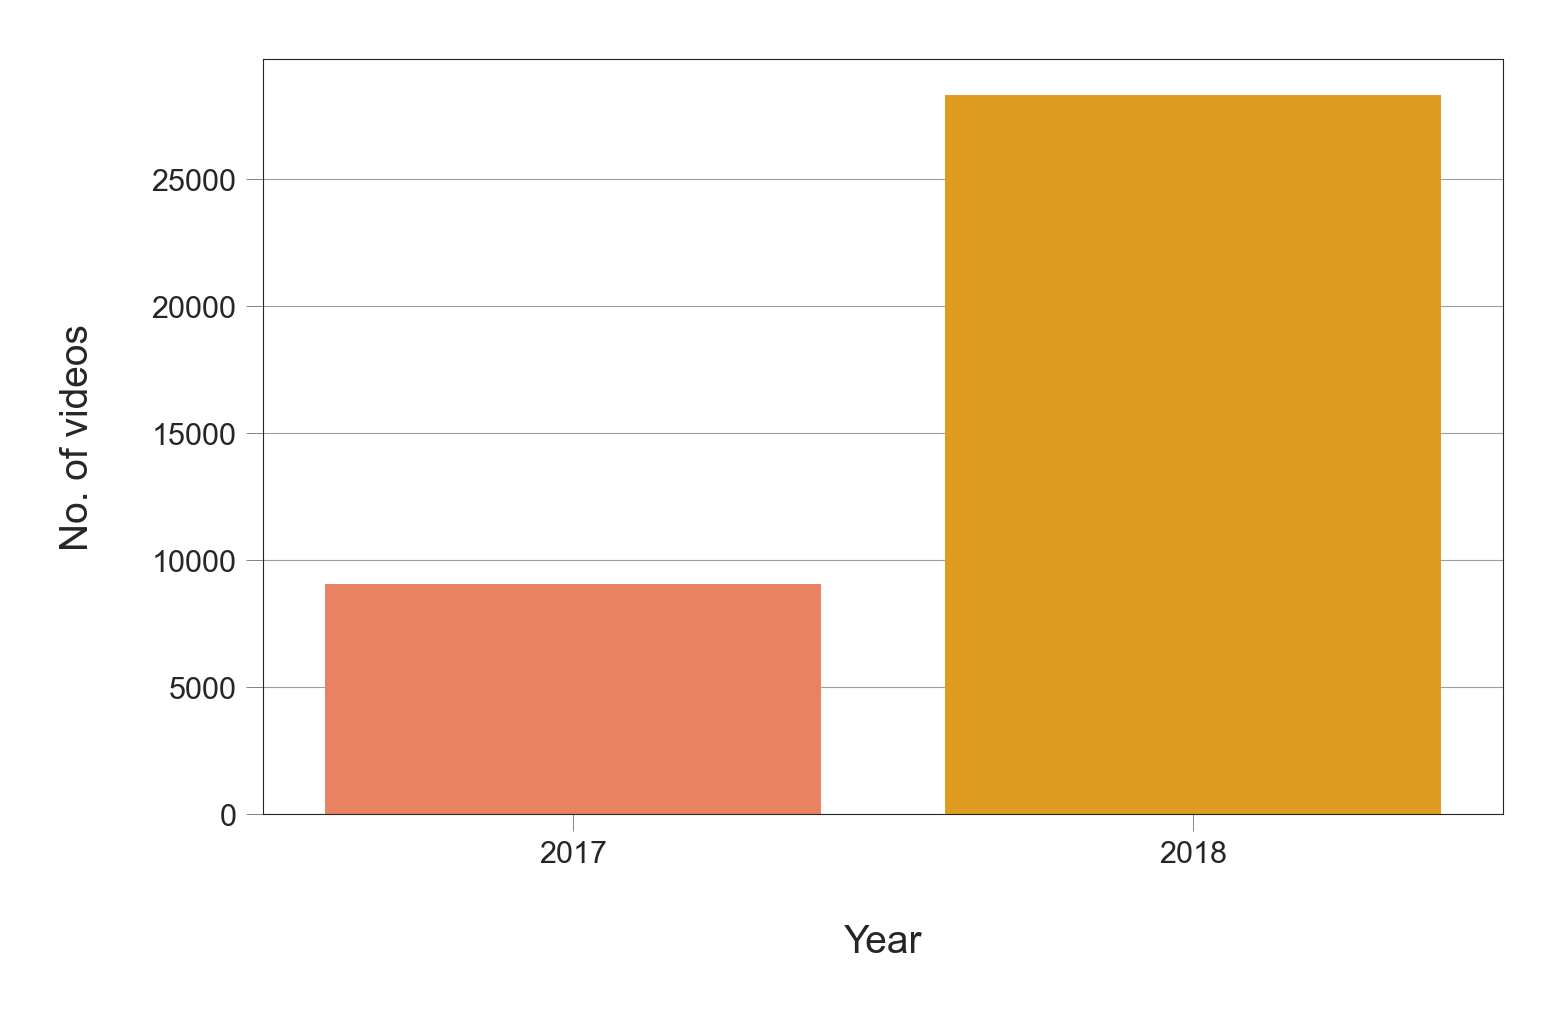

In [150]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index().rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [151]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.76
2017   0.24
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with around 76% of it in 2018 and 24% in 2017.

# Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset

In [152]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


We note from the table above that

* The average number of viewson a trending video is `1,060,477`. The median value for the number of views is `304,586` , which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
* The average number of likes on a trending video is `27,082` , while the average number of dislikes is `1,665`. 
* The average comment count is `2,677` while the median is `329`.

## Views Histogram


Let's plot a histogram for the views column to take a look at its distribution: to see how many videos have views between 10 million and 20 million, how many videos have between 20 million and 30 million, and so on

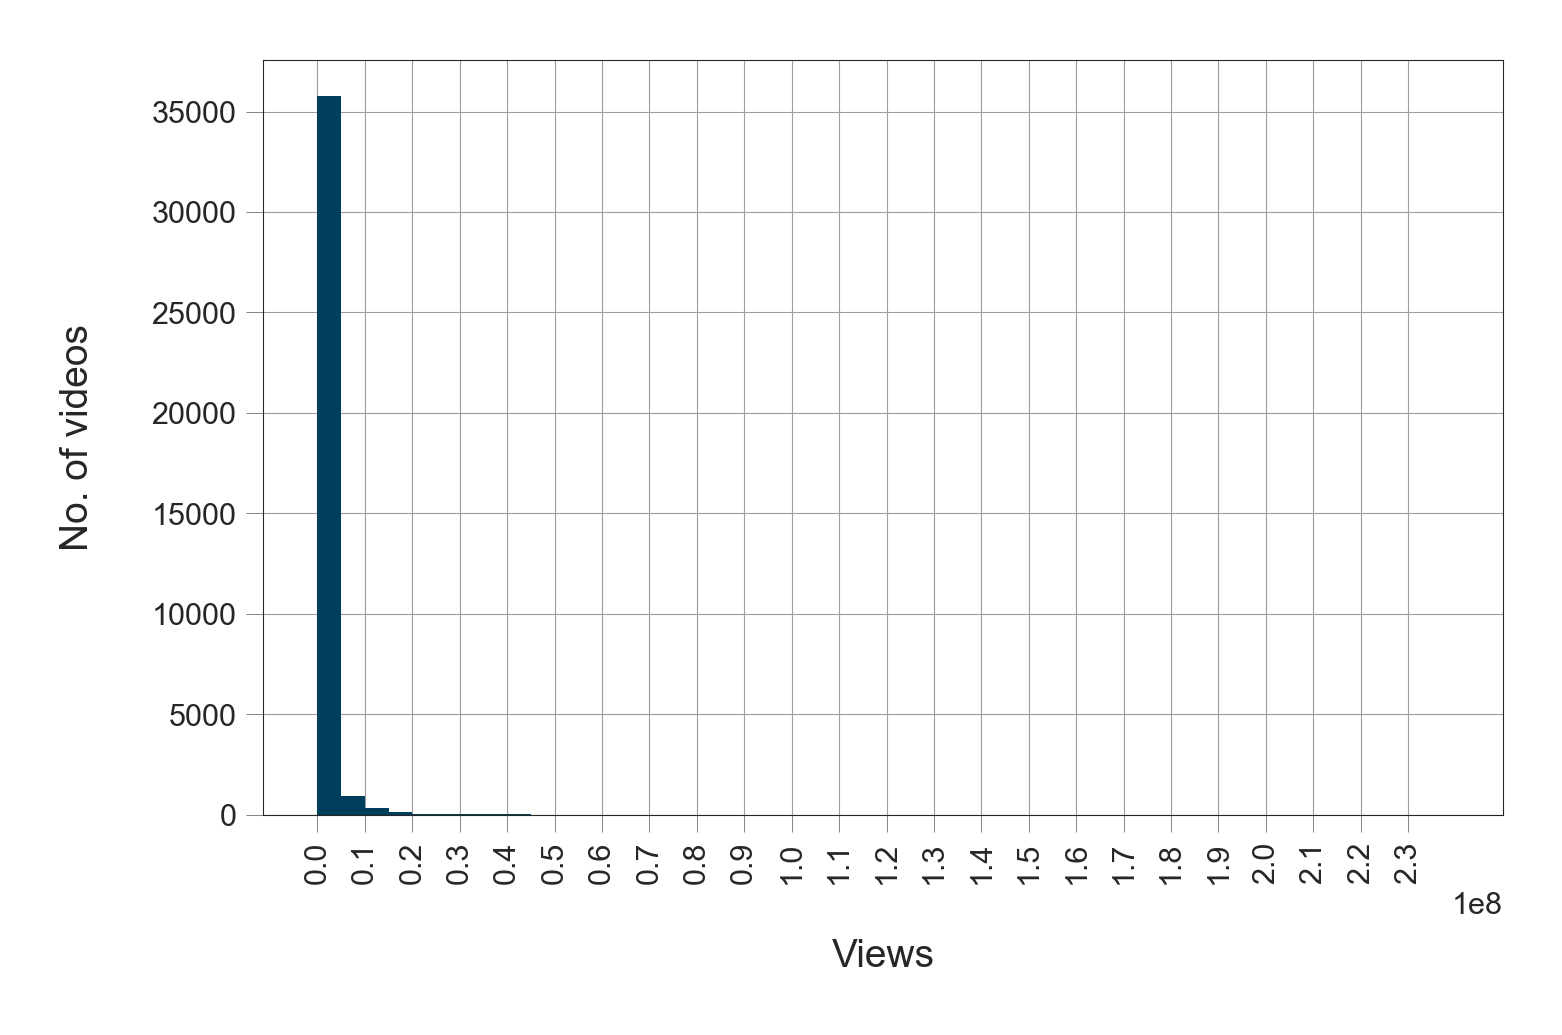

In [153]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

Now let's plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.

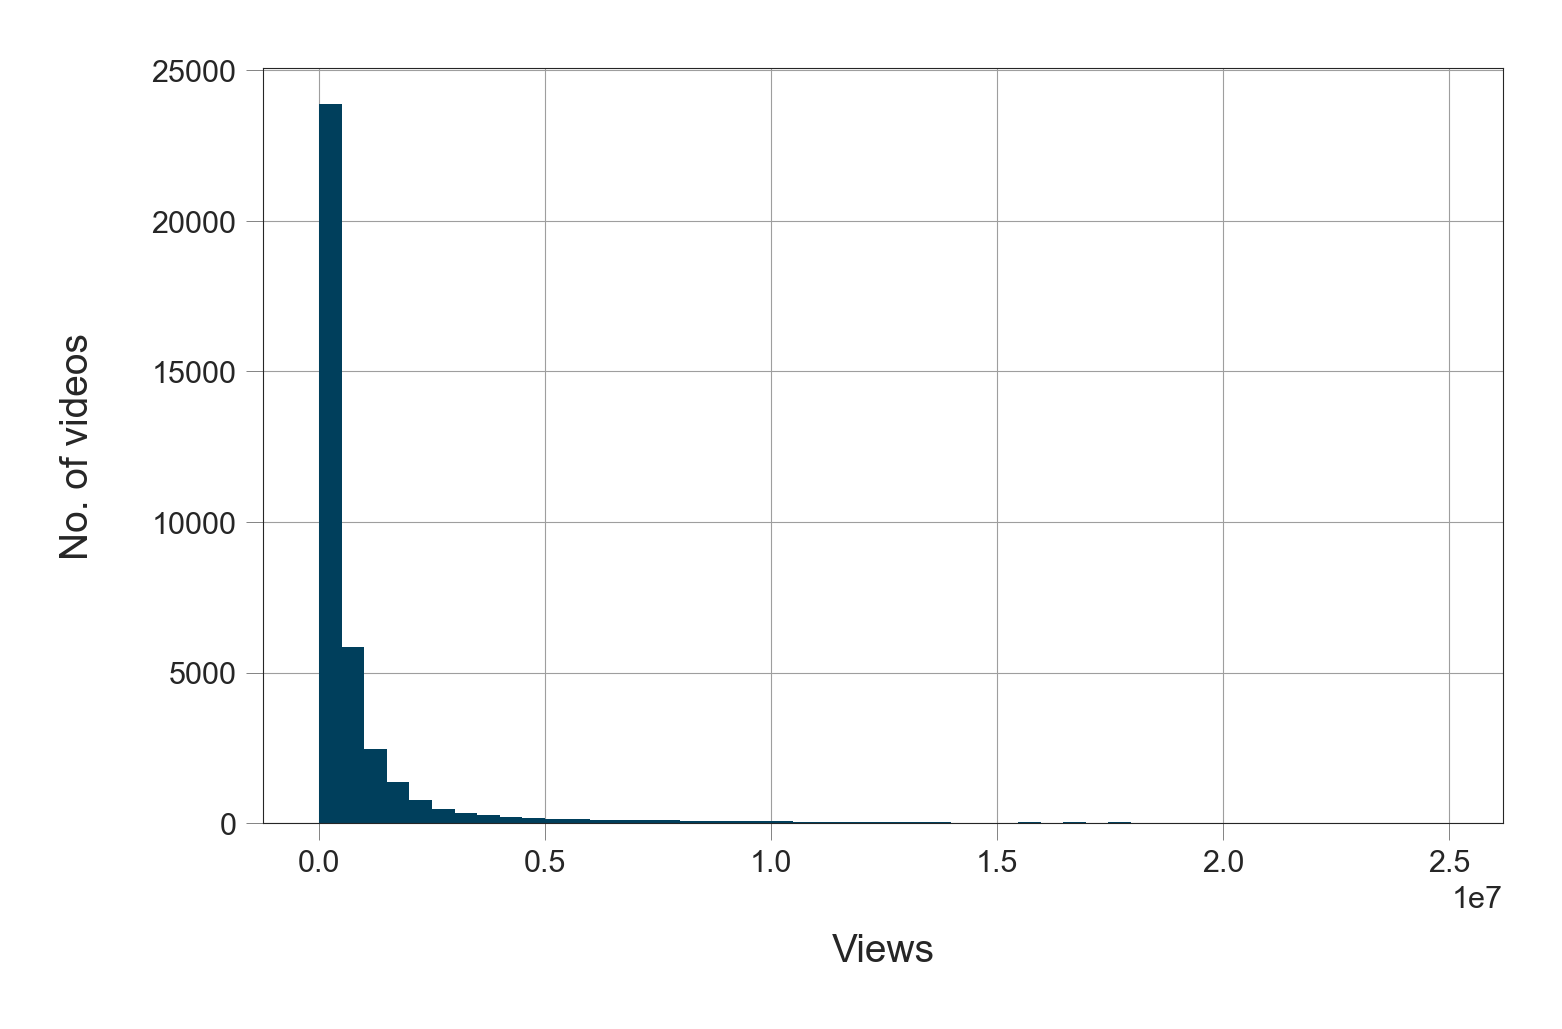

In [154]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less.

 Let's see the exact percentage of videos less than 1 million views.

In [156]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

79.56735917755408

In [58]:
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100

86.19083315485115

In [157]:
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

95.82887127864639

So, it is around `80%`. Similarly, we can see that the percentage of videos with less than 1.5 million views is around `86%`, and that the percentage of videos with less than 5 million views is around `95%`.

## Likes Histogram

Let's plot histogram for likes, now.

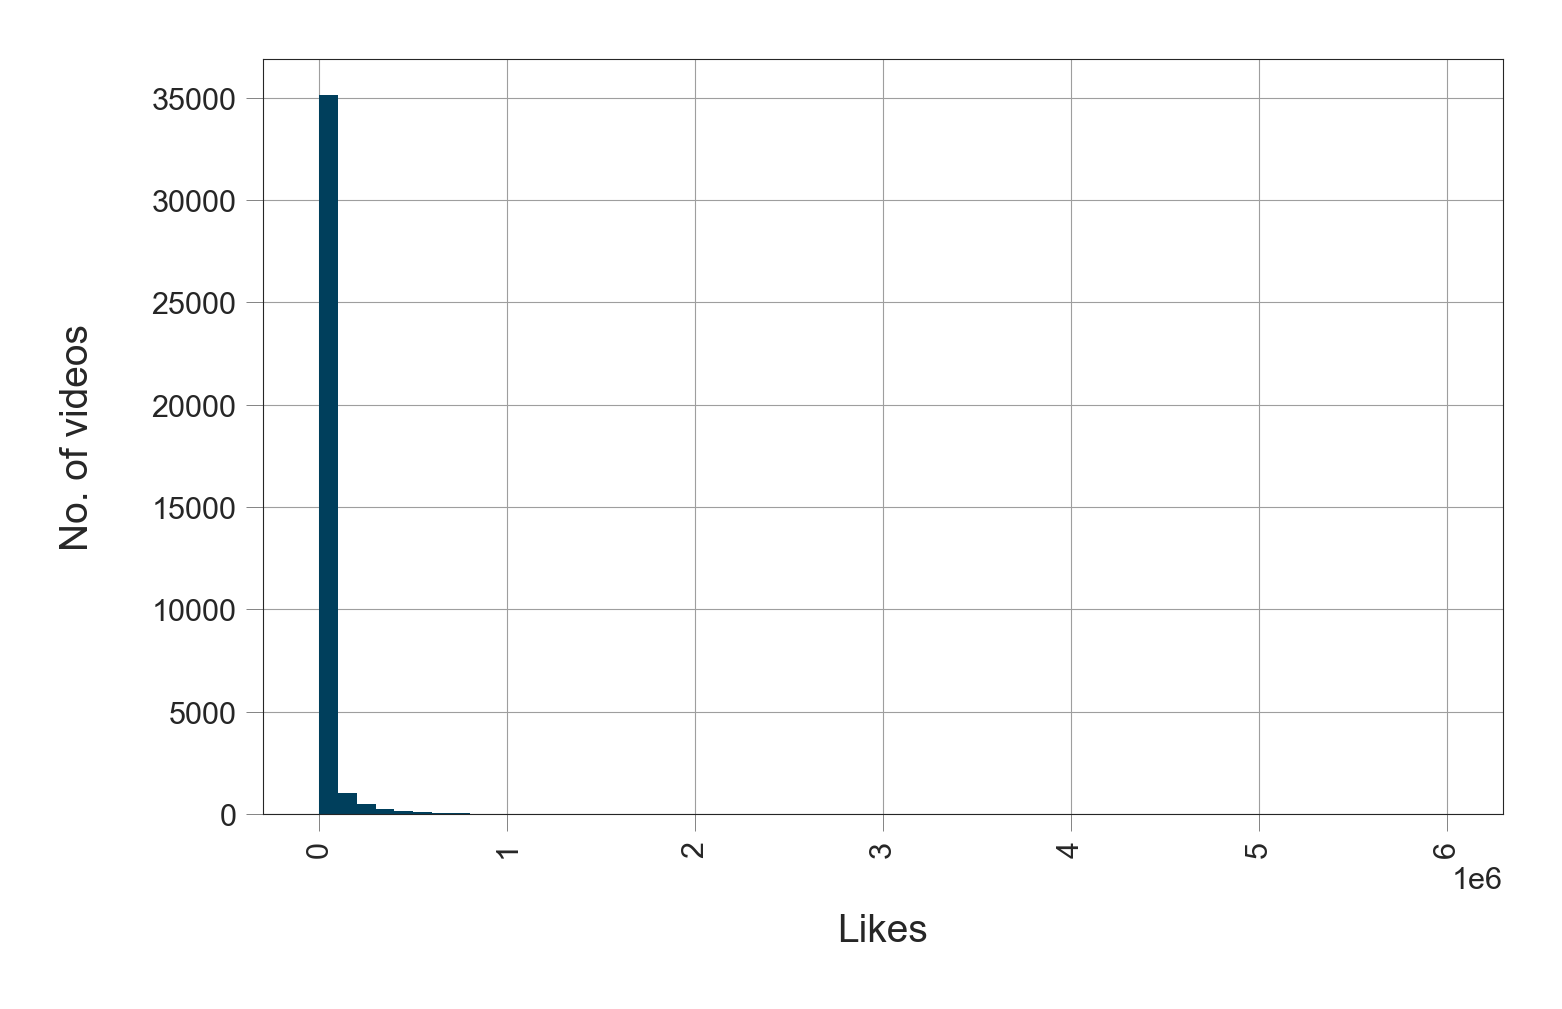

In [158]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let's plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

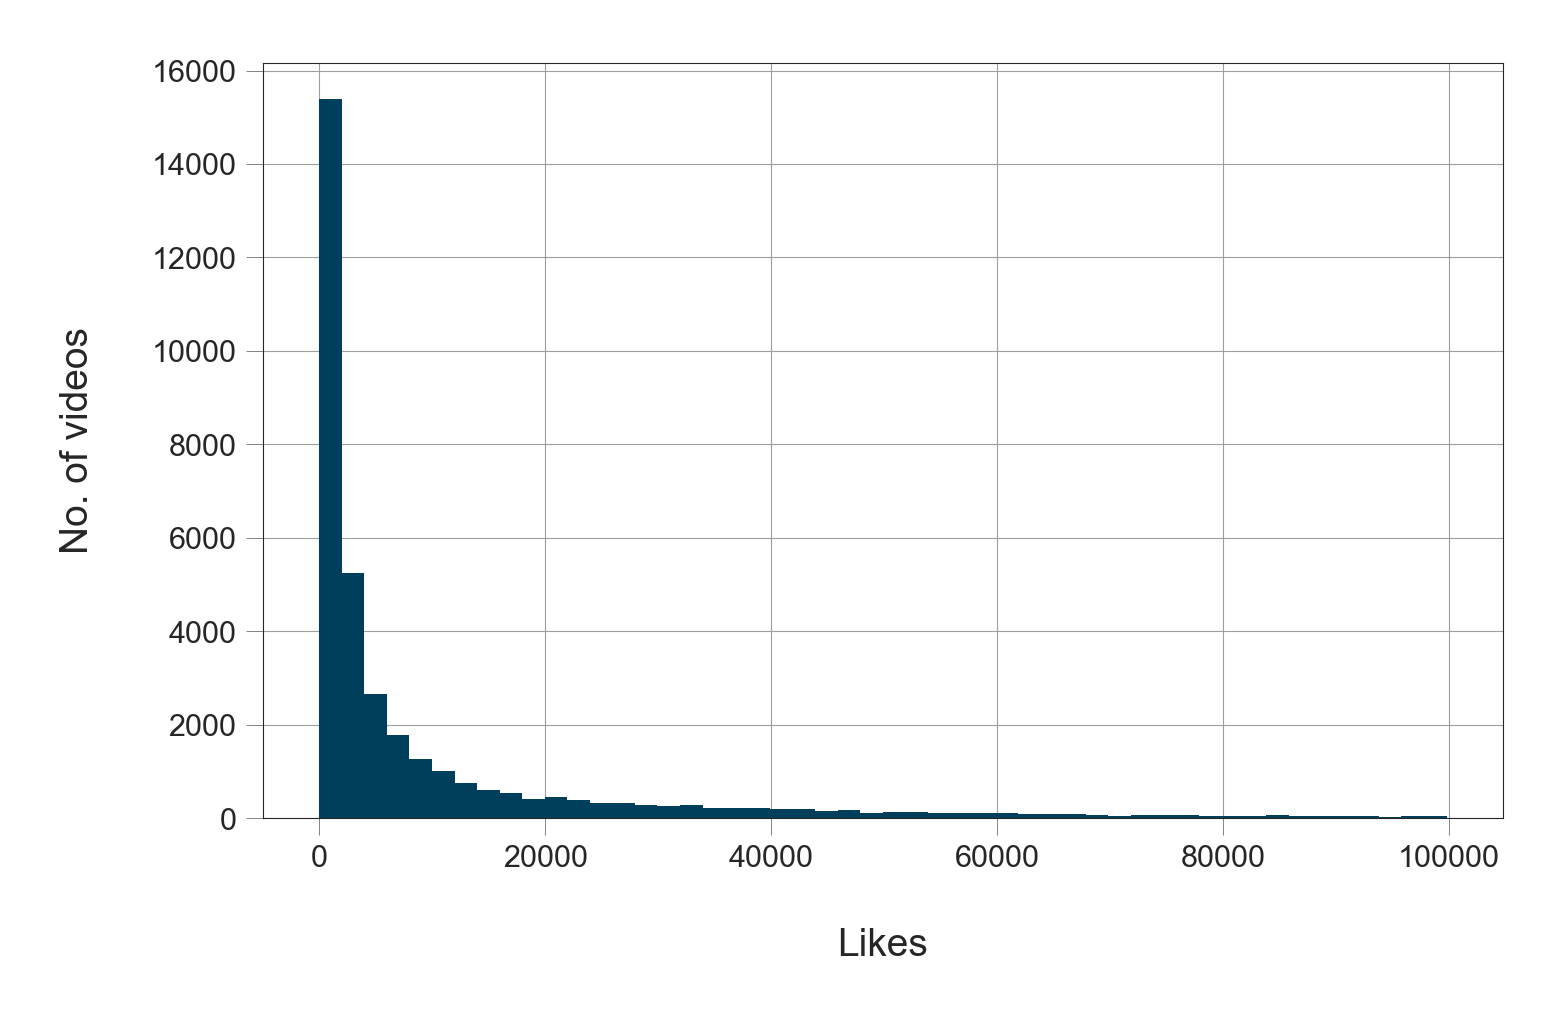

In [159]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 40000 likes

In [160]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

87.18676376097666

In [161]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

94.06725208824159

We see that the percentage of videos with less than 40,000 likes is around `87%`.
Similarly, we can see that the percentage of videos with less than 100,000 likes is around `94%`.

## Comment Count Histogram

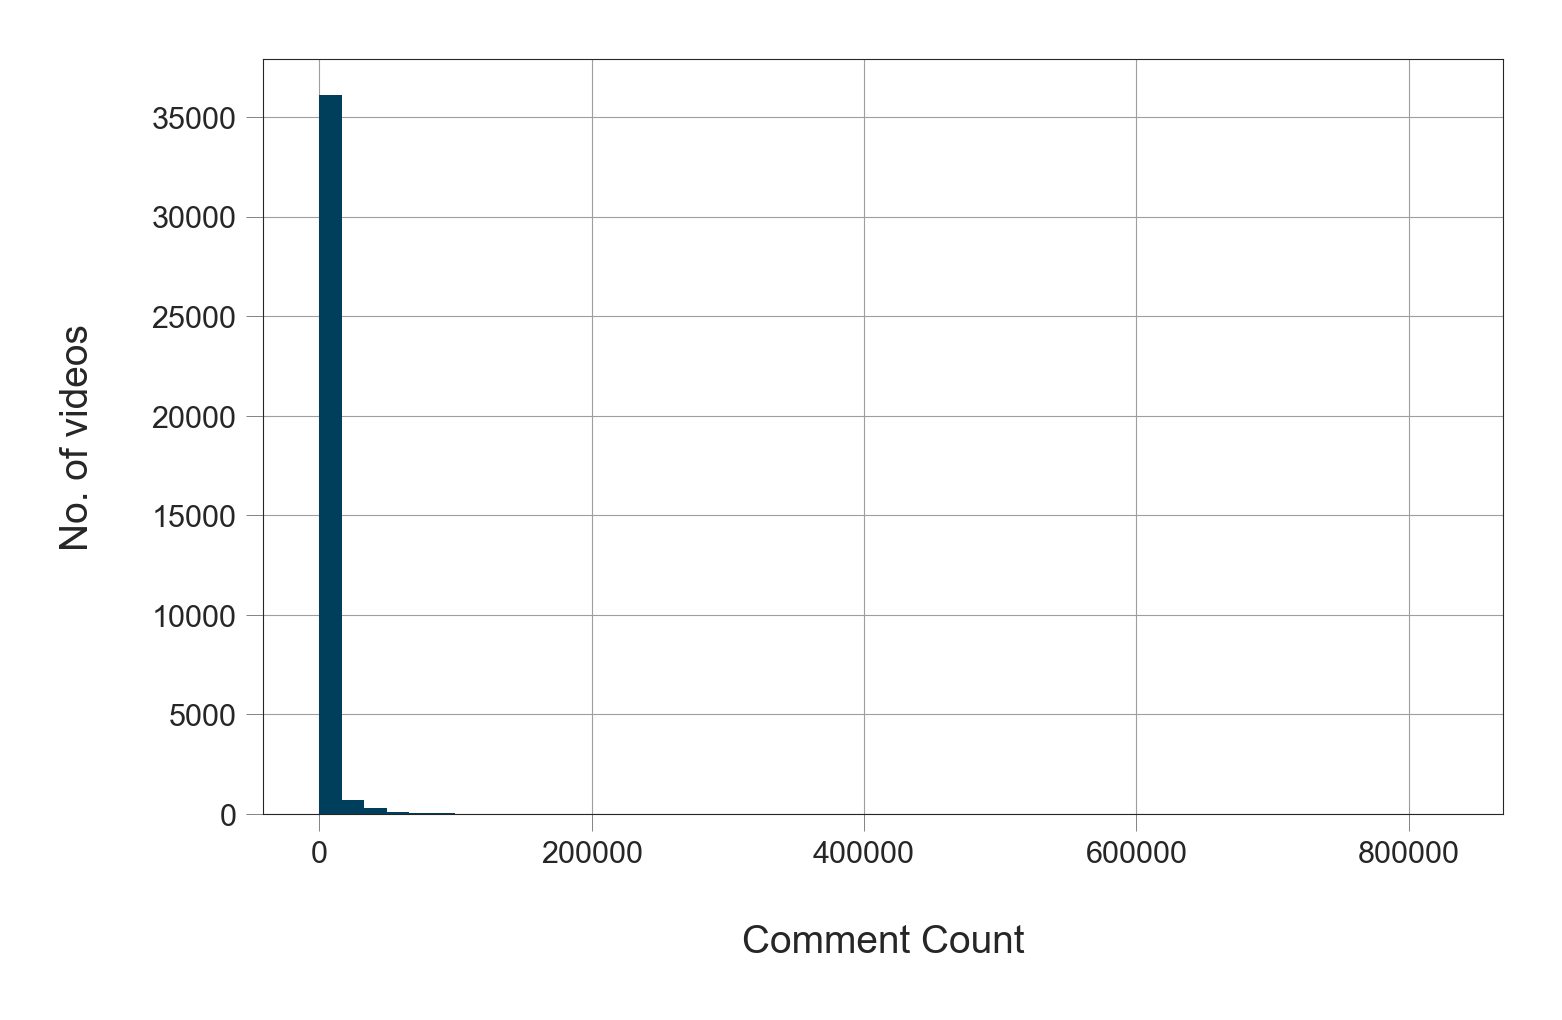

In [162]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than `200000`.

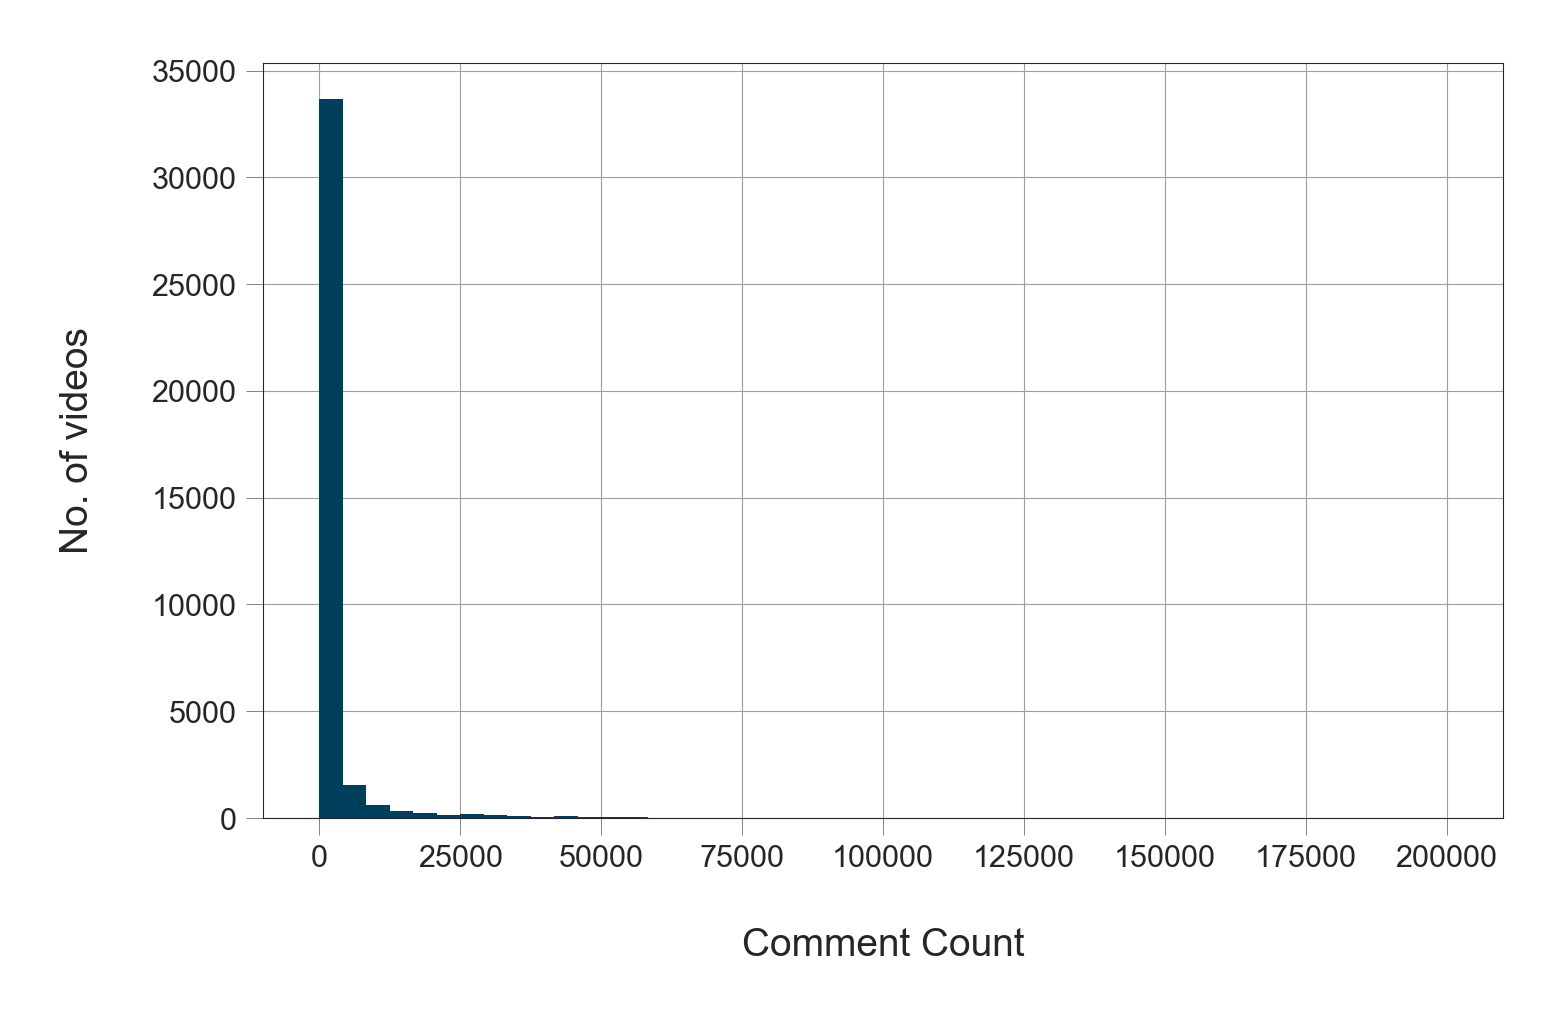

In [163]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

$$\frac{25000}{7}≈3571 \ comments $$
 
since each division in the graph has seven histogram bins.

As with views and likes, let's see the exact percentage of videos with less than 3500 comments

In [164]:
df[df['comment_count'] < 3500]['comment_count'].count() / df['comment_count'].count() * 100

88.41293638894838

In [165]:
df[df['comment_count'] < 25000]['comment_count'].count() / df['comment_count'].count() * 100

97.6895480831013

Thus, we see that percentage of videos with comment count less than 3500 is around `88%` whereas less than 25000 is `97%`.

# Description of non-numerical columns

After we are done with numerical columns of our dataset, let's move to non-numerical columns of the dataset.

In [166]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


From the table above, we can see that there are `205` unique dates, which means that our dataset contains collected data about trending videos over `205` days.

From video_id description, we can see that there are `37352` videos (which is expected because our dataset contains `37352` entries), but we can see also that there are only `16307` unique videos which means that some videos appeared on the trending videos list on more than one day. The table also tells us that the top frequent title is *`Mission: Impossible - Fallout (2018) - Official...`* and that it appeared `19` times on the trending videos list.

But there is something strange in the description table above: Because there are `16307` unique video IDs, we expect to have `16307` unique video titles also, because we assume that each ID is linked to a corresponding title. But total unique title are `16721`. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. For publish_time column, the unique values are less than `16307`, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles.

In [167]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
134,#NAME?,17.14.11,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24,2017-11-13T08:59:27.000Z,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",31052,36,11,2,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg,False,False,False,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...
173,#NAME?,17.14.11,कुंभ राशि वालों के लिए 12 नवंबर - 18 नवंबर का ...,Jansatta,25,2017-11-11T09:09:06.000Z,"कुंभ राशि|""Astro""|""rashi""|""कुंभ""|""jansatta""",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,
189,#NAME?,17.14.11,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",Health Tips for You,26,2017-11-08T12:27:17.000Z,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा..."
298,#NAME?,17.15.11,18 नवम्बर 2017शनि अमावस्या को जरा से काले तिल ...,AstroMitram,22,2017-11-14T05:41:47.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",28816,376,31,29,https://i.ytimg.com/vi/-X33hZ1oTXI/default.jpg,False,False,False,शनि अमावस्या 18 नवम्बर 2017 को जरा से काले तिल...
360,#NAME?,17.15.11,BEST MOM EVER- Things you would love to hear f...,Old Delhi Films,24,2017-11-14T06:52:06.000Z,"Mother|""mom""|""best mom""|""best dad ever""|""best ...",14529,1018,131,83,https://i.ytimg.com/vi/-x9Bp5lFyM0/default.jpg,False,False,False,"Things your MOTHER will never say, still you r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923,4642,908,920,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37194,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37202,#NAME?,18.14.06,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...
37316,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2


We can clearly see that some videos appeared on the trending page with more than one video title.

# Do the trending video titles contain captitalized words?

Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise.

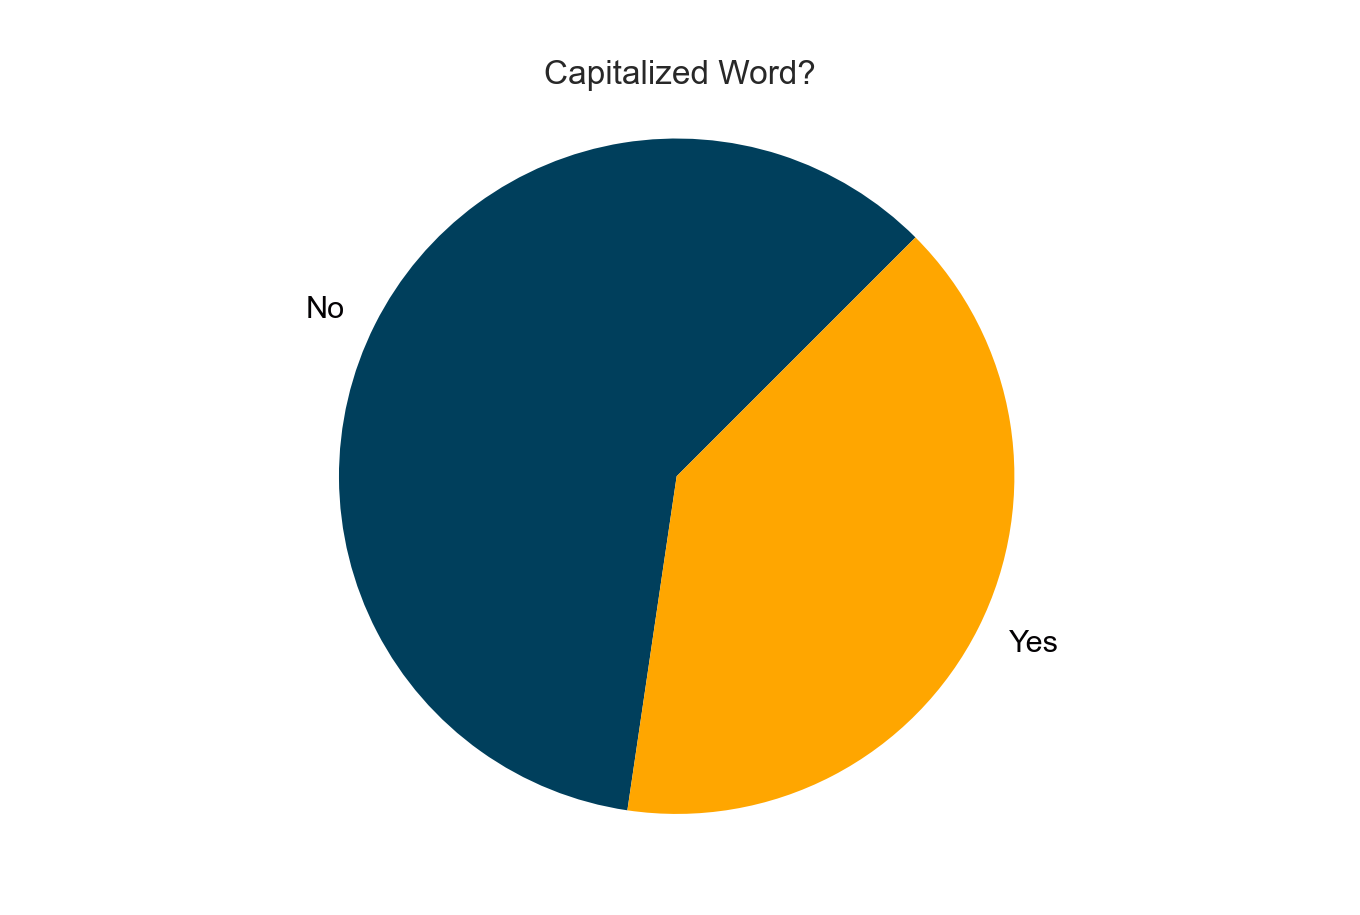

In [168]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=[PLOT_COLORS[4], '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Capitalized Word?')

In [169]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.60
True    0.40
Name: contains_capitalized, dtype: float64

We can see that around `40%` of trending video titles contain at least a capitalized word. We will later use this added new column contains_capitalized in analyzing correlation between variables.

# Video Title Lengths

Let's add another column called title_length to our dataset.

In [170]:
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88


Let's plot the histogram of title lengths to get an idea about the lengths of trending video titles.

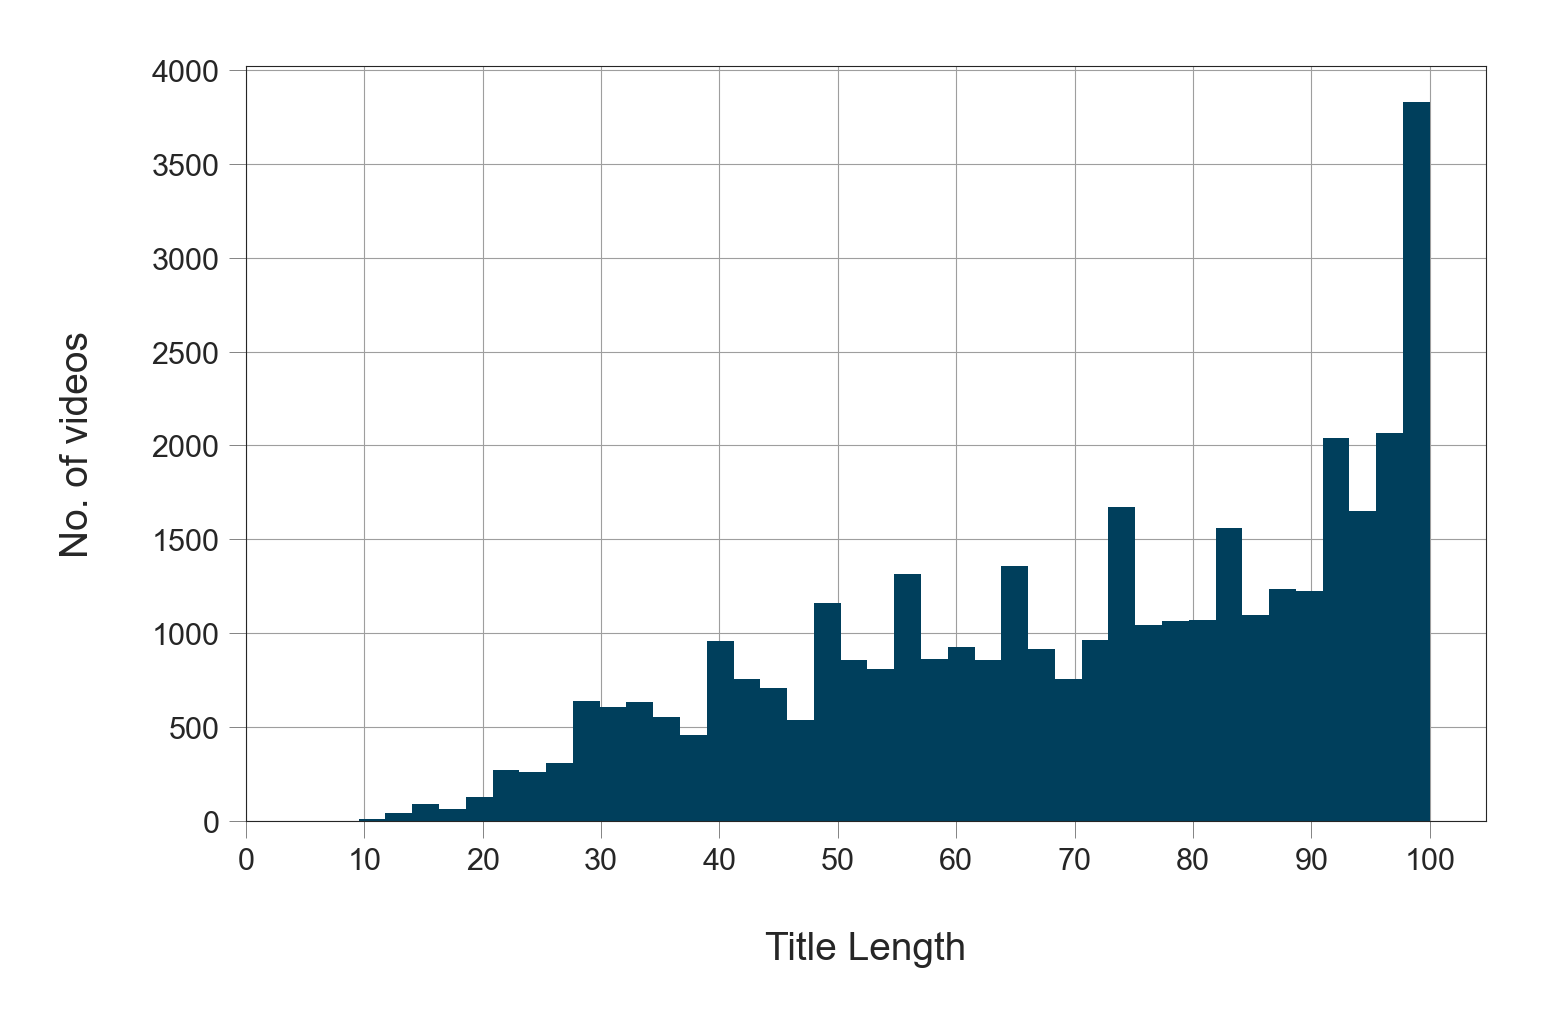

In [171]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that most video title has lengths around 75 to 100.

Let's draw the scatter plot to see the relation between title lengths and number of views.

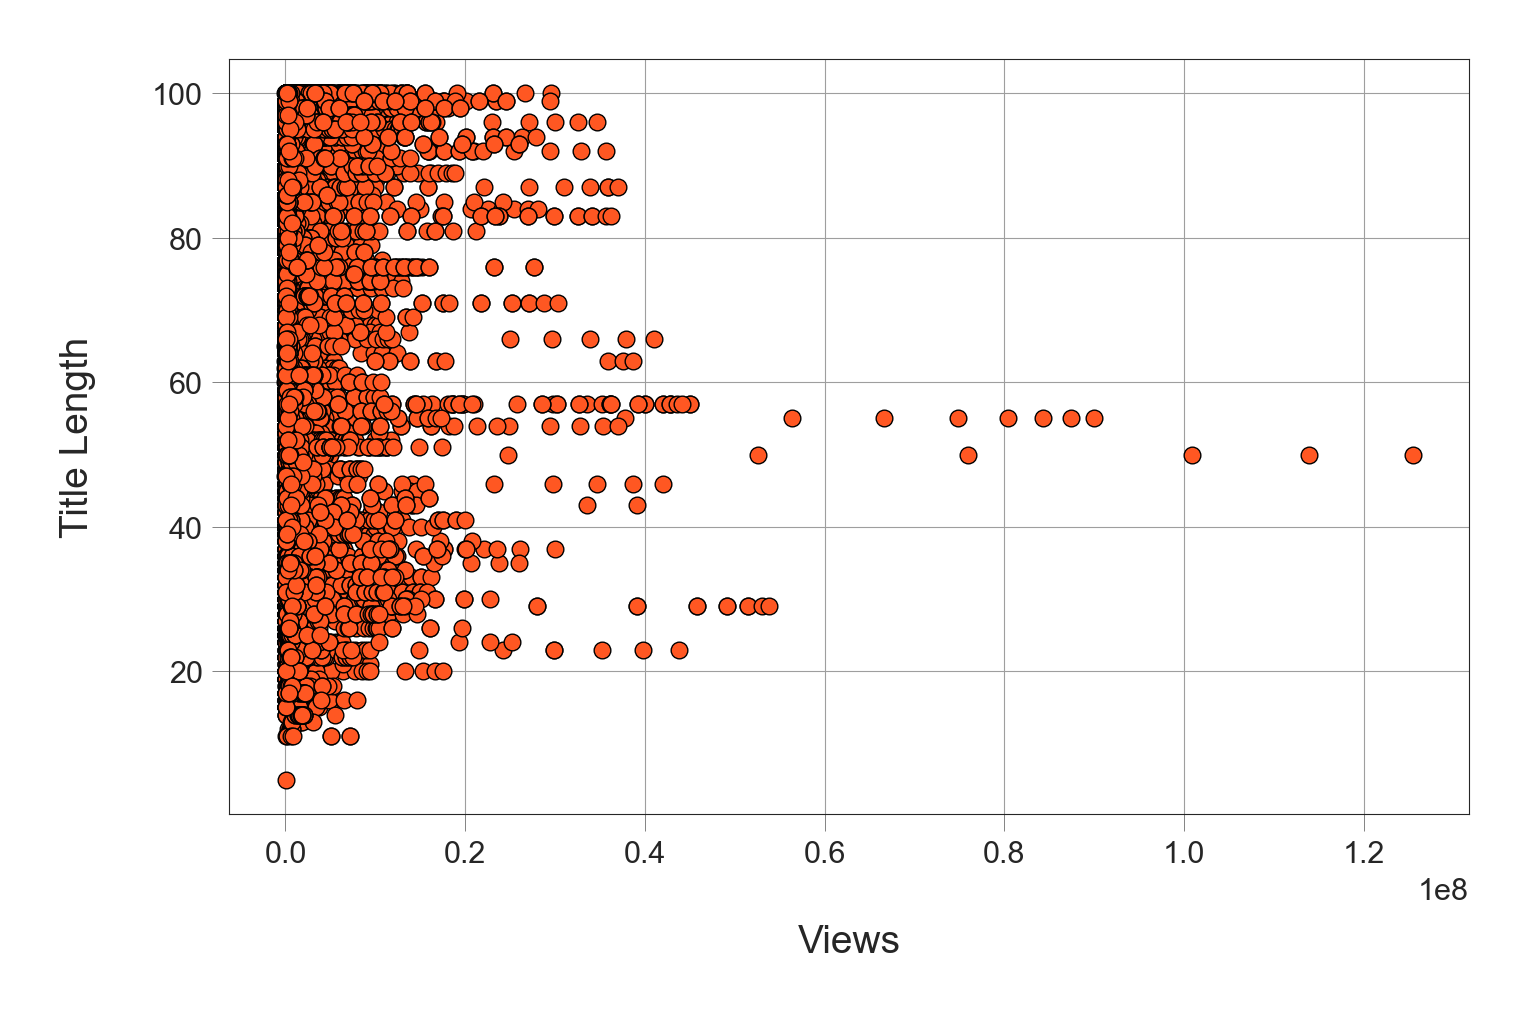

In [172]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 40,000,000 views and more have title length between 22 and 65 characters approximately whereas videos having 60,000,000 views and more have title length between 50 and 55 characters approximately.



# Correlation between dataset variables

Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only).

In [173]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.18,-0.13,-0.04,-0.04,0.04,0.06,-0.05,0.02,-0.16
views,-0.18,1.00,0.85,0.54,0.67,-0.03,-0.03,0.00,-0.02,-0.05
likes,-0.13,0.85,1.00,0.49,0.78,-0.05,-0.04,0.03,-0.01,-0.17
dislikes,-0.04,0.54,0.49,1.00,0.71,-0.01,-0.02,0.00,-0.01,-0.03
comment_count,-0.04,0.67,0.78,0.71,1.00,-0.03,-0.02,0.02,0.01,-0.12
comments_disabled,0.04,-0.03,-0.05,-0.01,-0.03,1.00,0.35,-0.00,-0.02,0.09
ratings_disabled,0.06,-0.03,-0.04,-0.02,-0.02,0.35,1.00,-0.00,-0.01,0.05
video_error_or_removed,-0.05,0.00,0.03,0.00,0.02,-0.00,-0.00,1.00,-0.01,-0.03
contains_capitalized,0.02,-0.02,-0.01,-0.01,0.01,-0.02,-0.01,-0.01,1.00,-0.01
title_length,-0.16,-0.05,-0.17,-0.03,-0.12,0.09,0.05,-0.03,-0.01,1.00


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation `0.78` between likes and comment count, and between dislikes and comment count `0.71`.

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap.

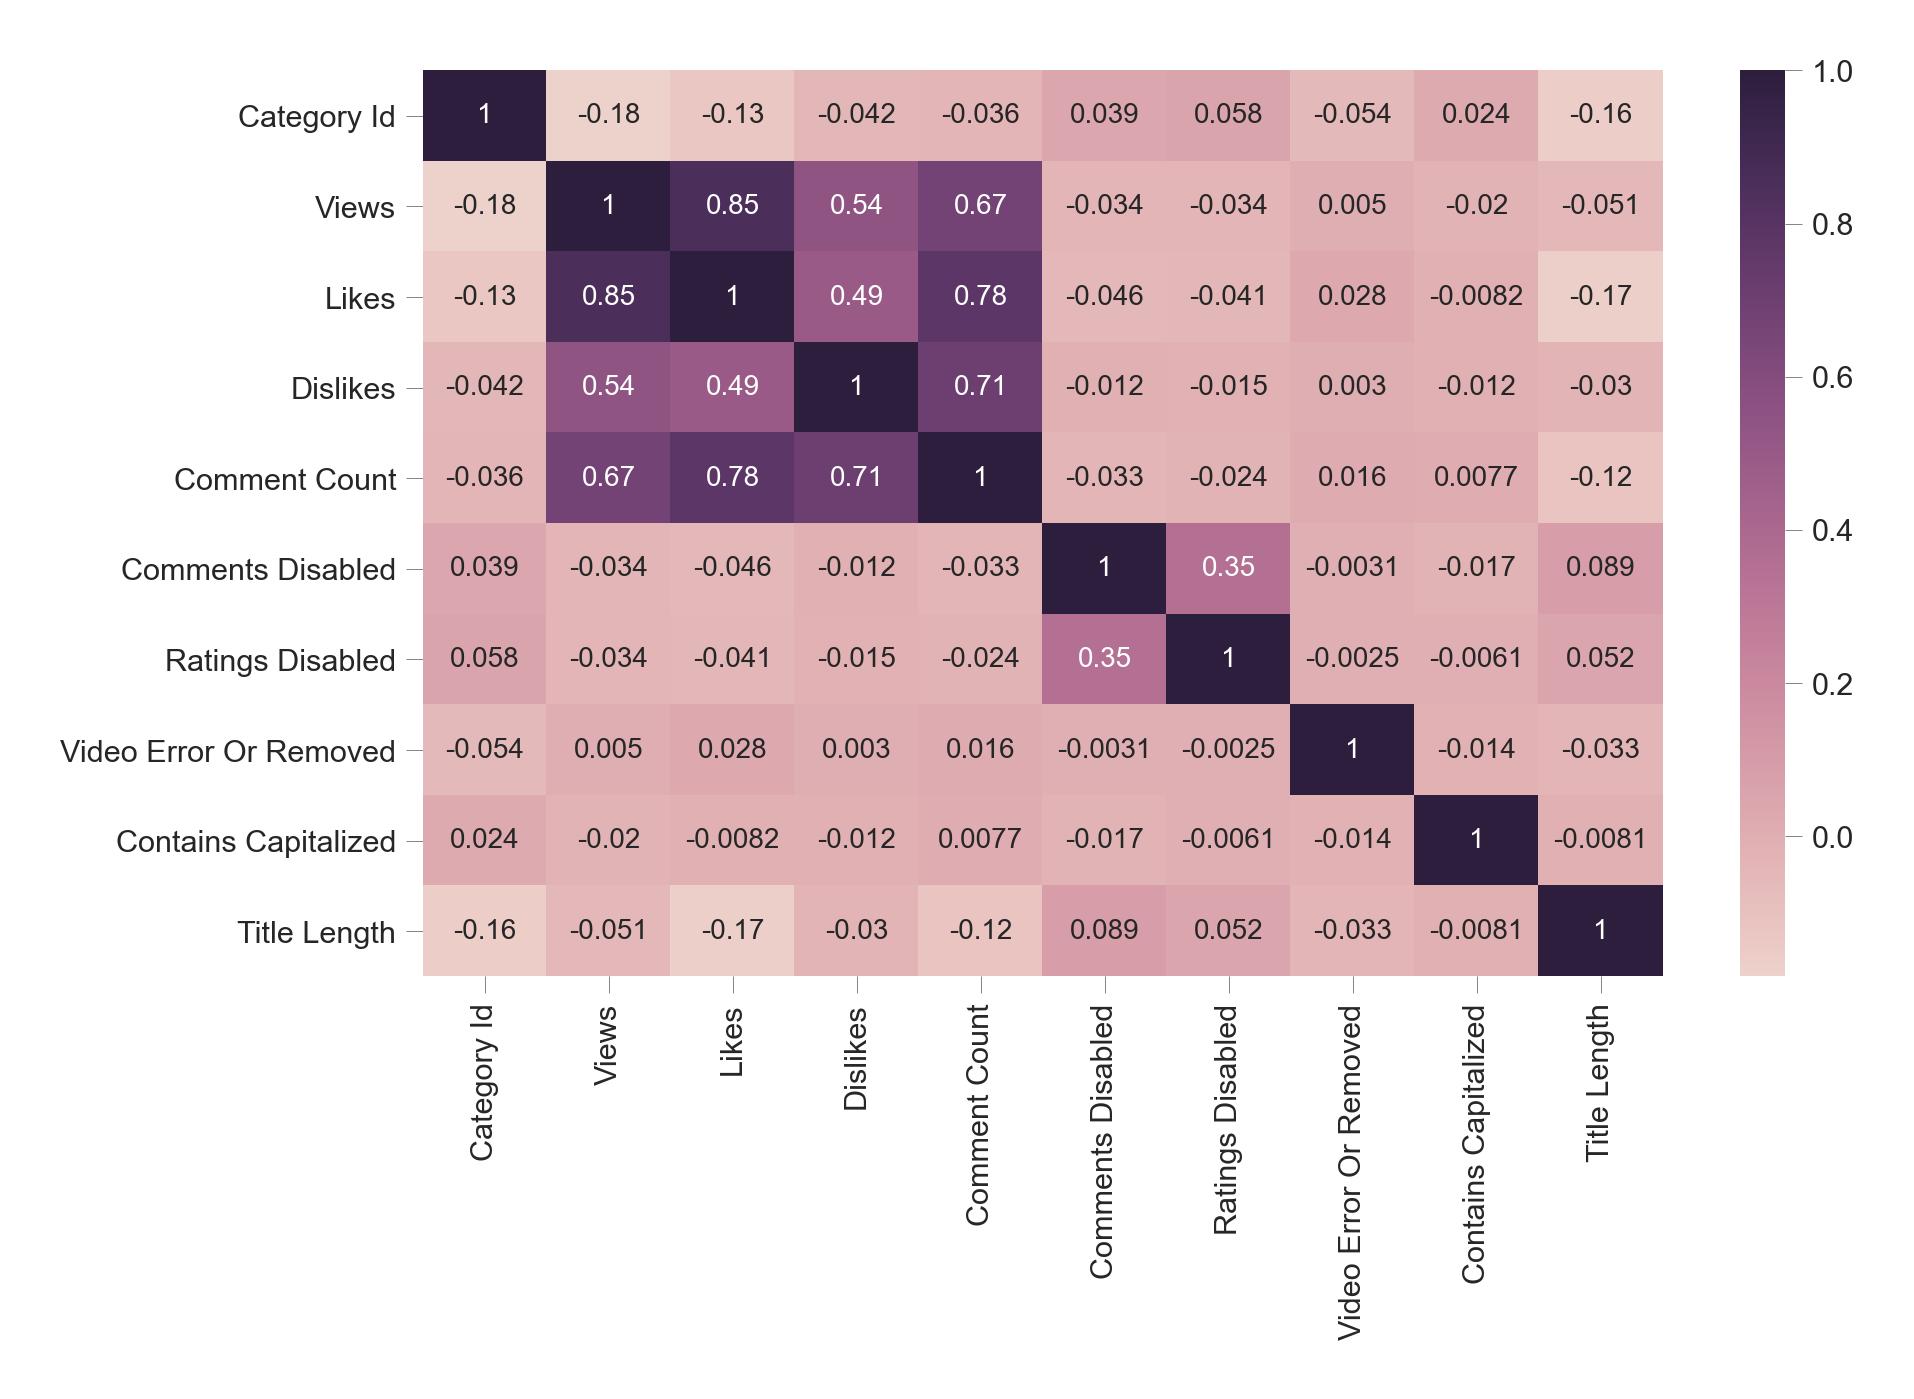

In [174]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. 

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

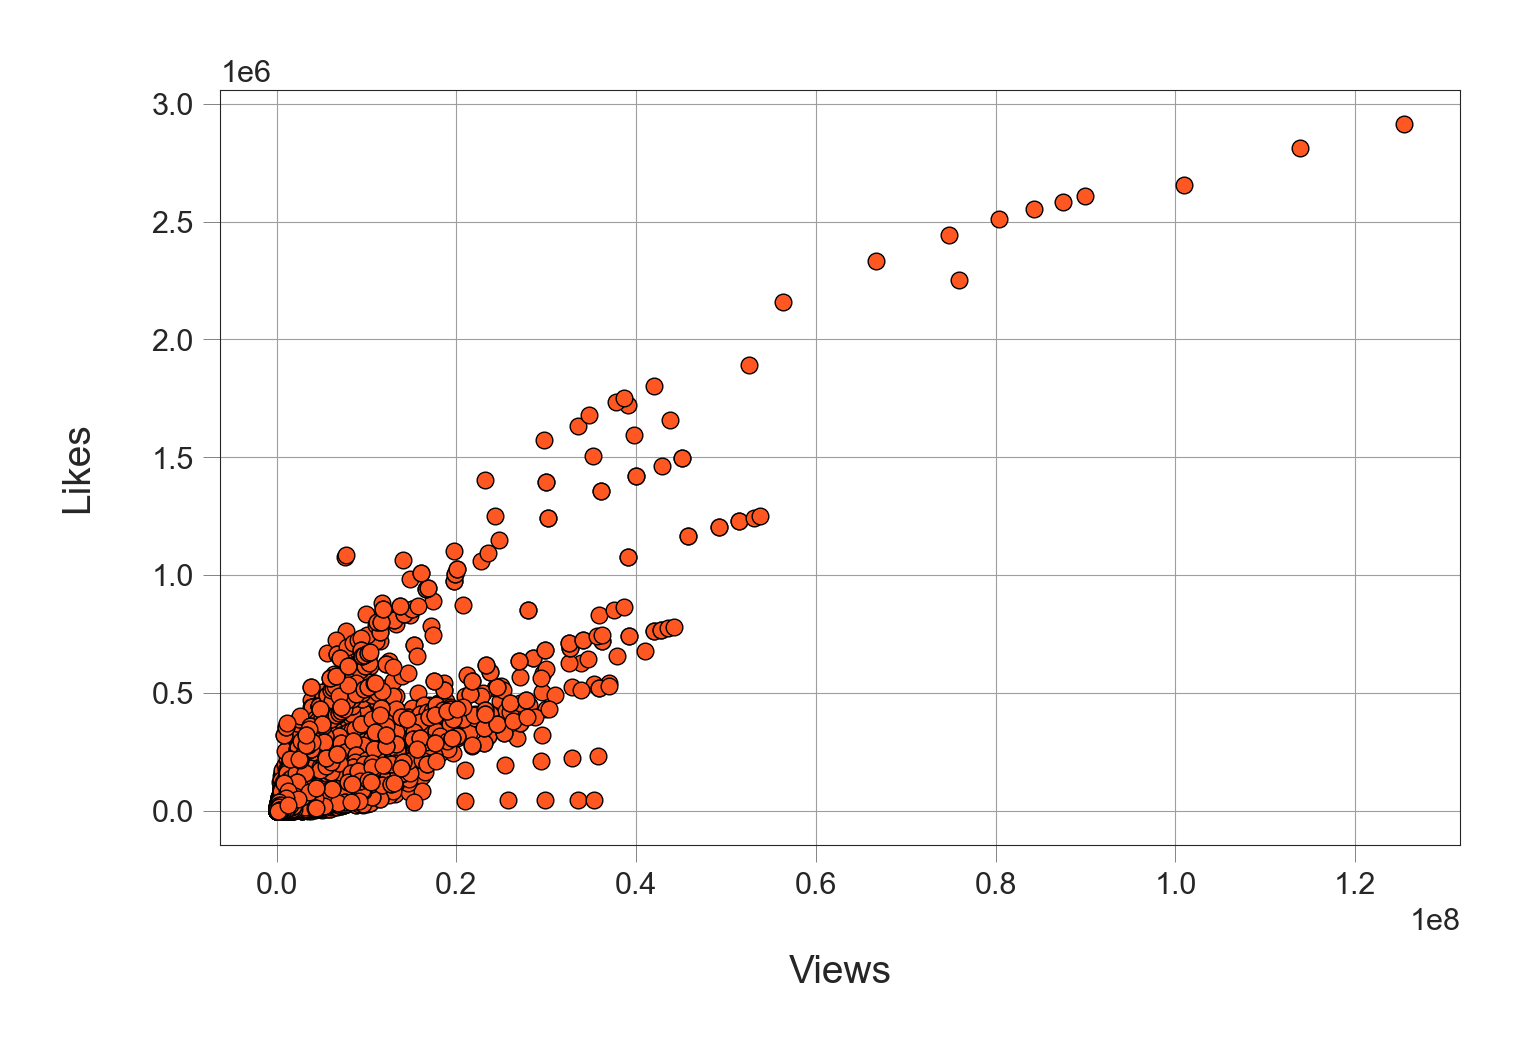

In [175]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too — mostly.

# Most Common Words in Video Titles

Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles.

In [176]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248),
 ('Songs', 1149),
 ('2', 1143),
 ('New', 1137),
 ('May', 1075),
 ('Punjabi', 1037)]

We see that characters like `|` and `-` have been used a lot in video titles - 41986 and 15777 respectively. Also, words like `Movie`, `Telugu`, `Full`, `Video`, etc. are very common in video titles, each occured in more than 1500 video titles.b

Why not draw a word cloud for the titles of our trending videos? 

Word Cloud is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is.

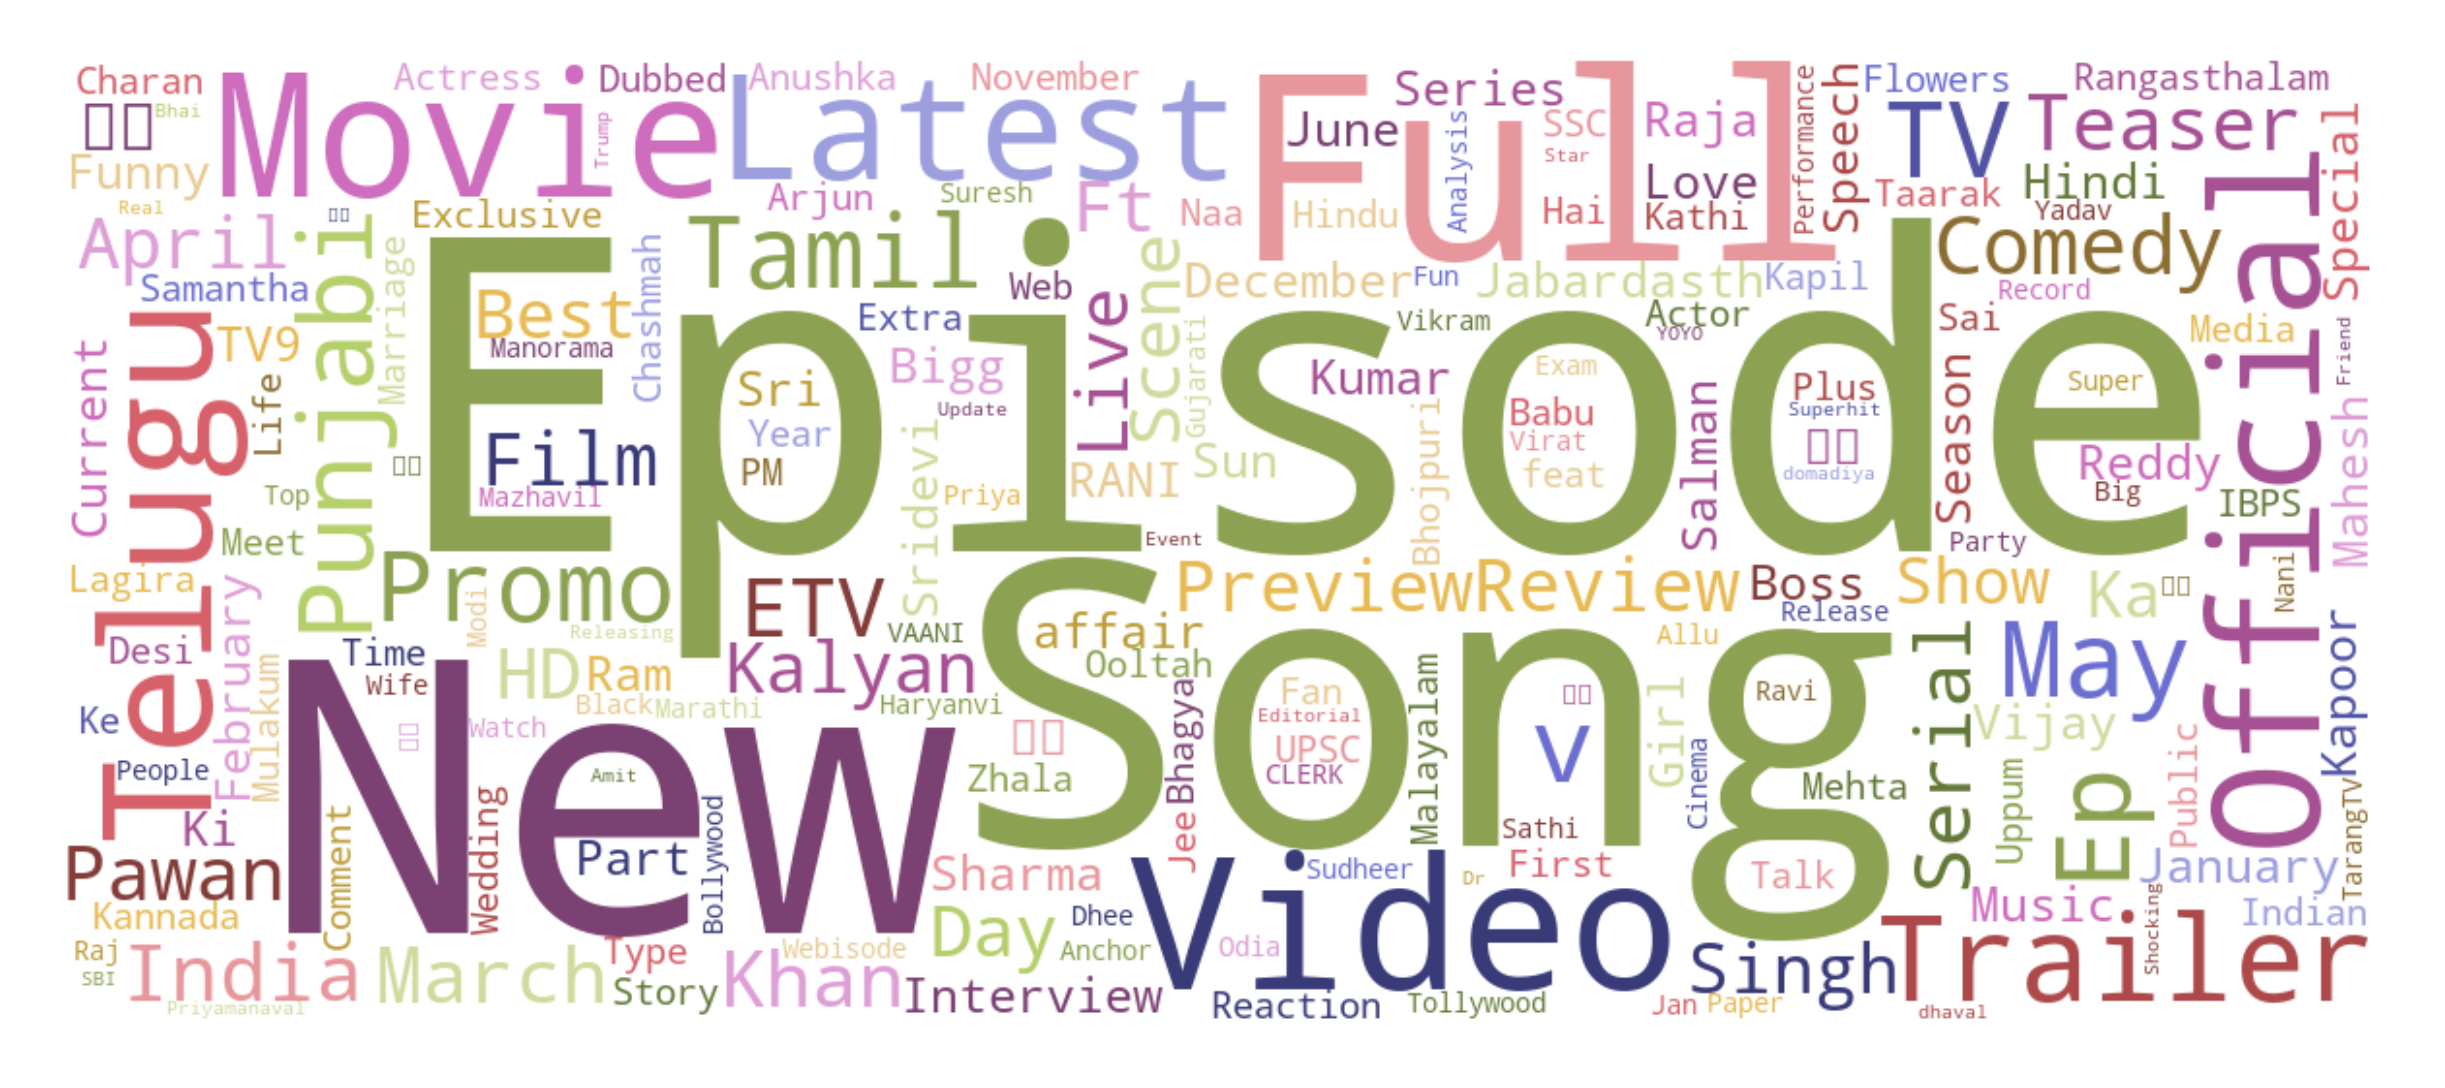

In [177]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Which channels have the largest number of trending videos?

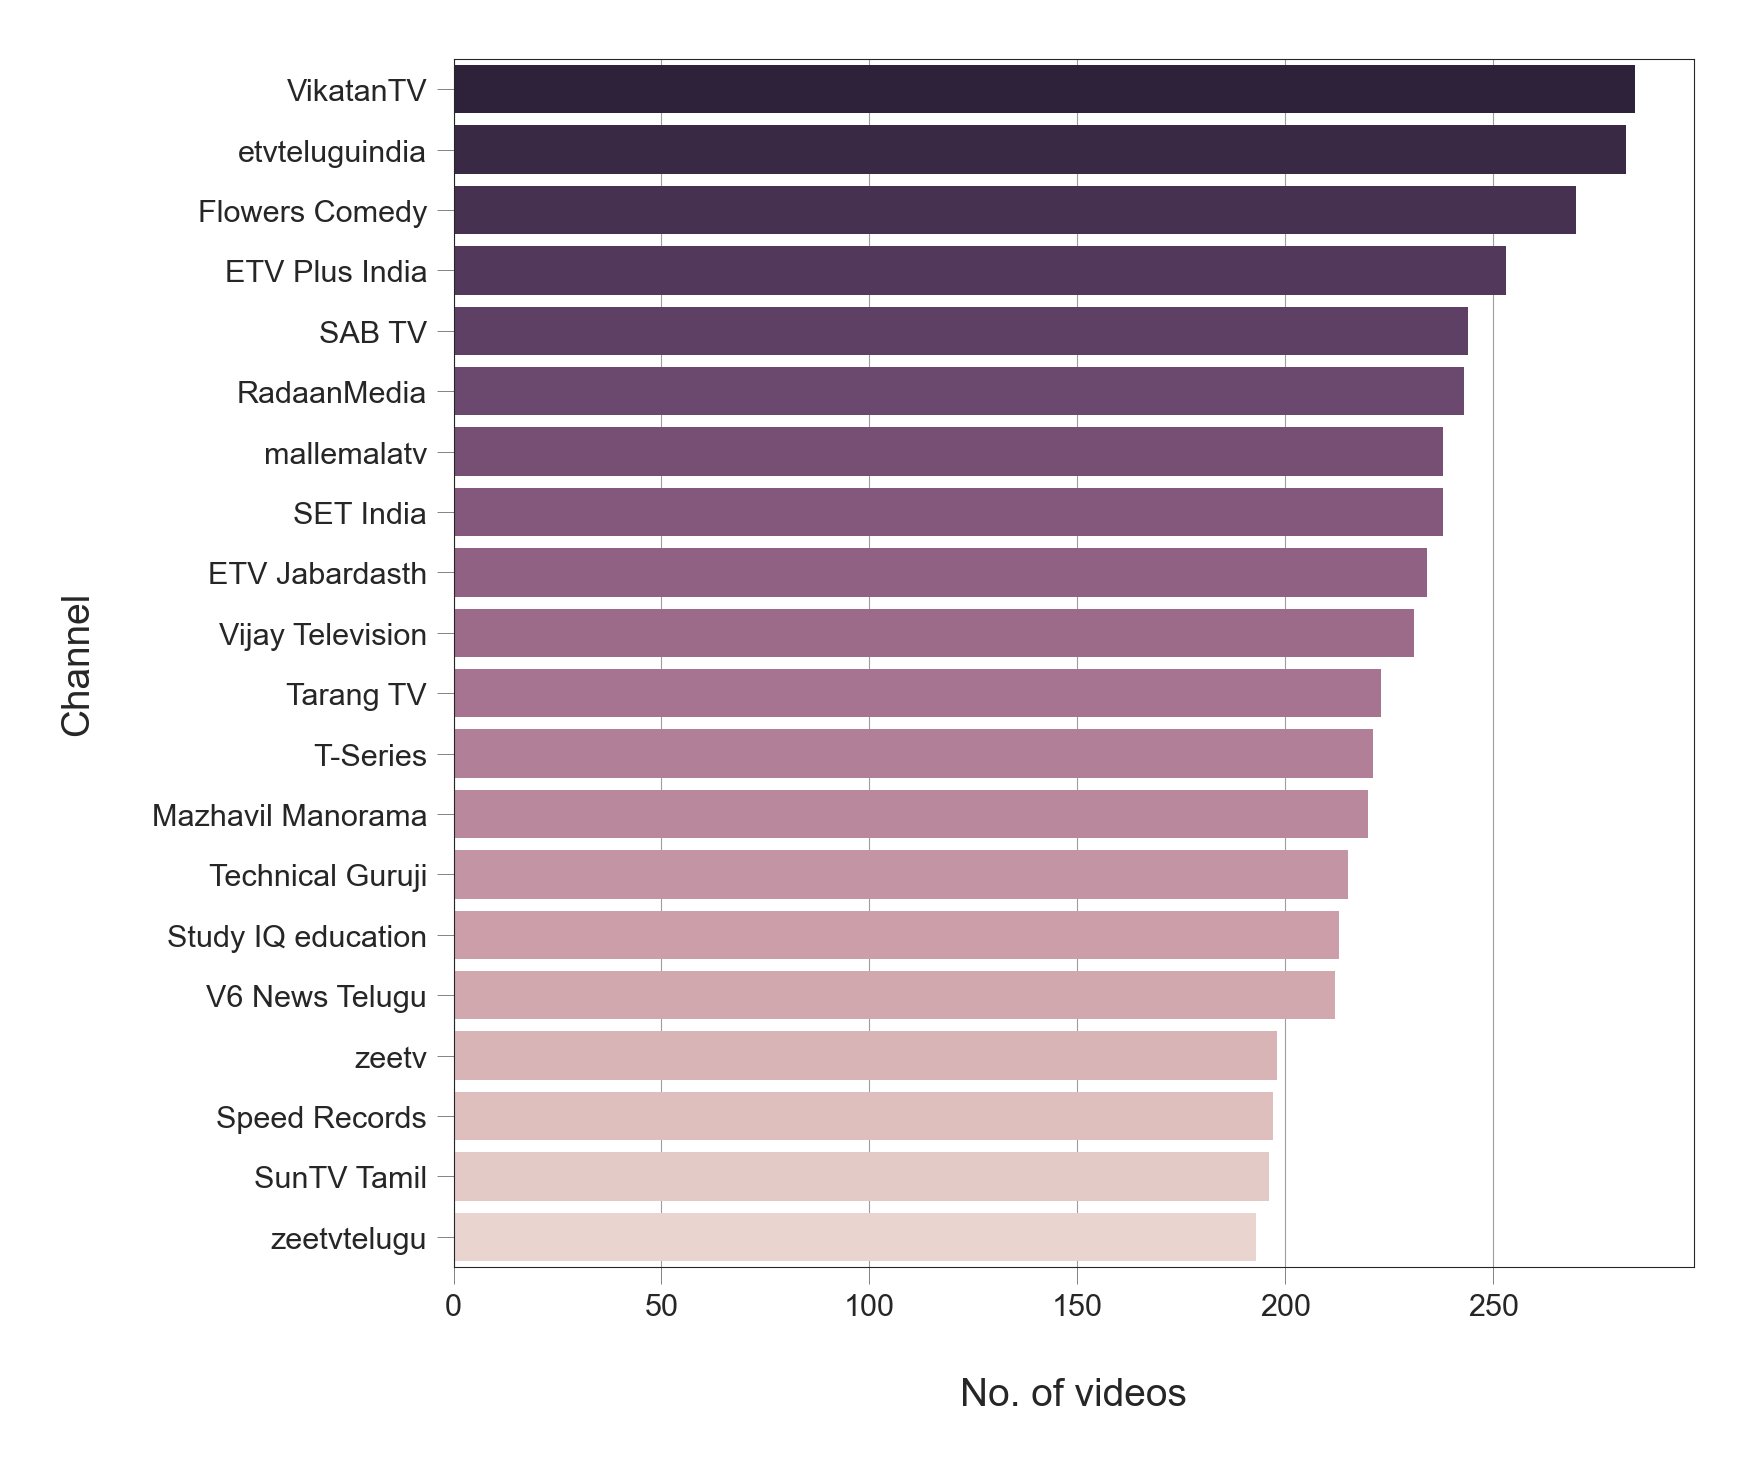

In [178]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

# Which video category has the largest number of trending videos?

First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [179]:
with open("./dataset/IN_category_id.json") as file:
    categories = json.load(file)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [180]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58,News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88,Entertainment


Now that we have added catergory_name to each video, we can see which category had the largest number of trending videos.

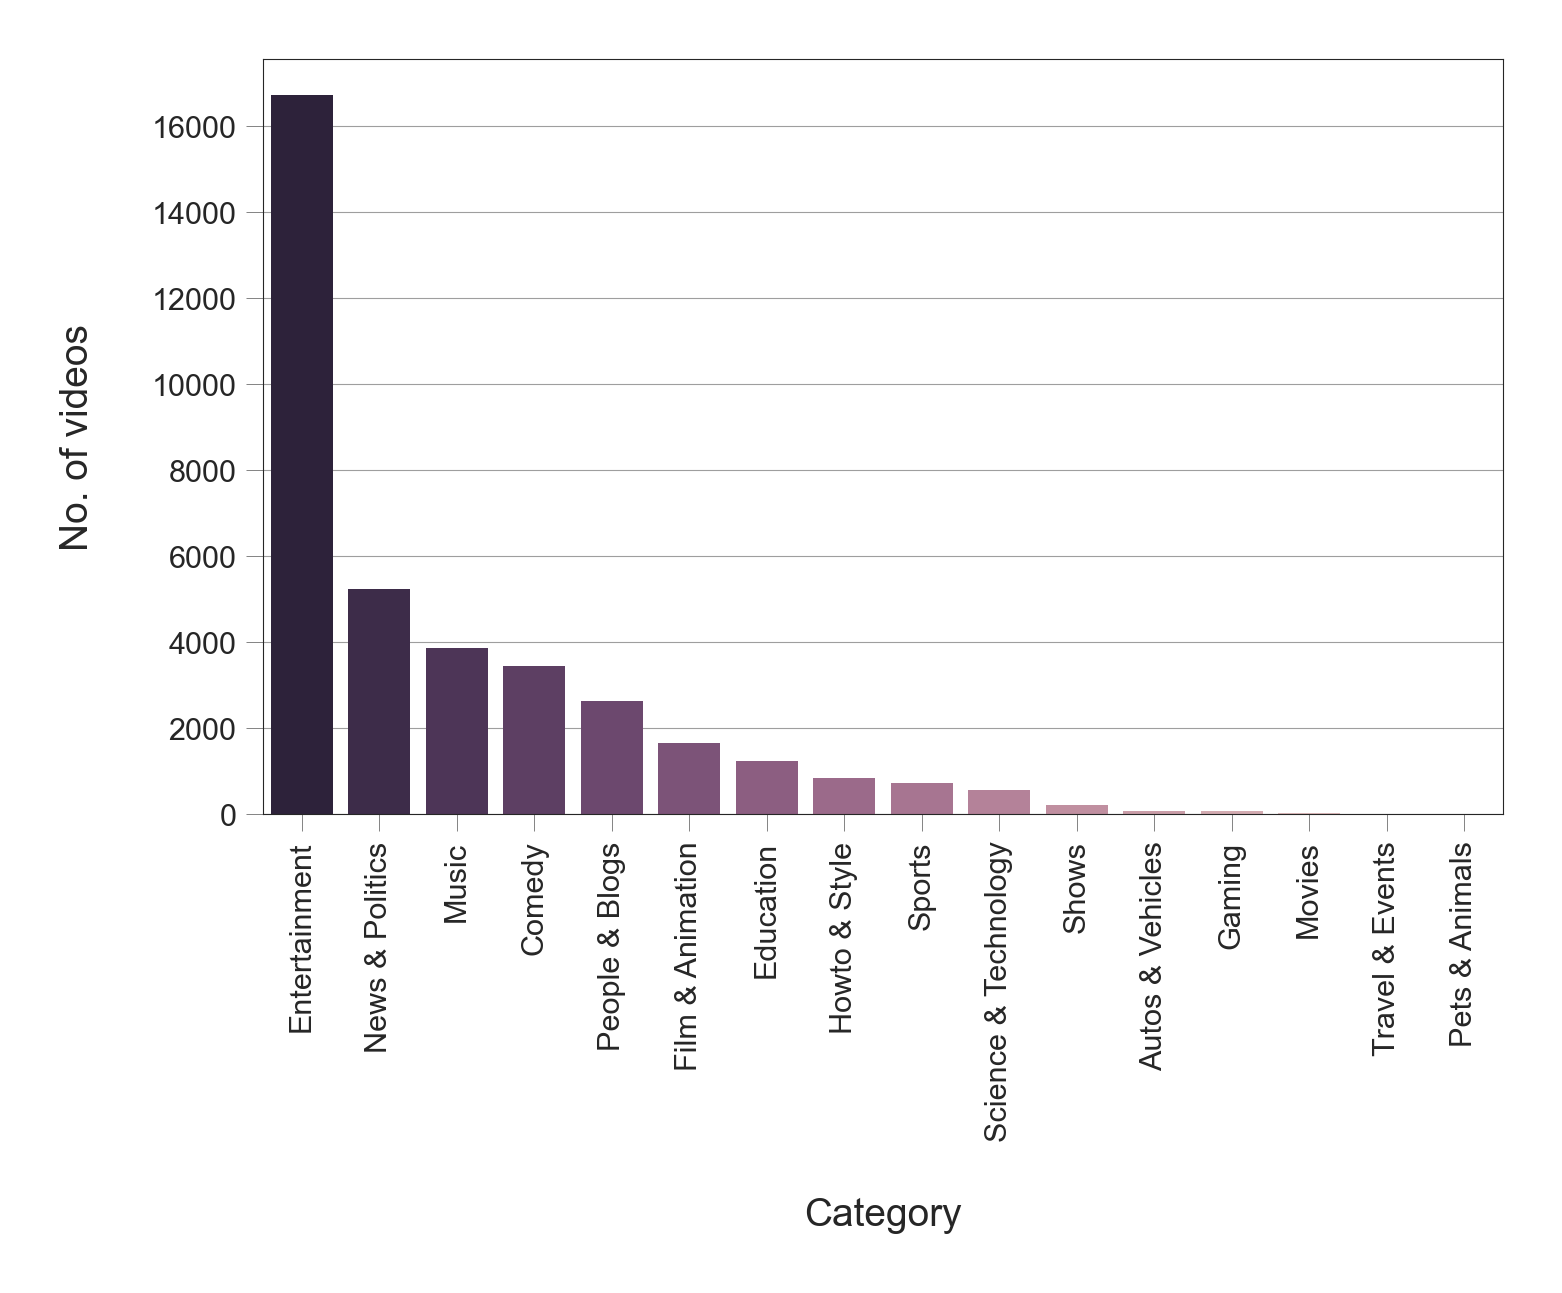

In [181]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [183]:
len(df[(df["category_name"] == 'Entertainment')].index)

16712

In [184]:
len(df[(df["category_name"] == 'News & Politics')].index)

5241

In [185]:
len(df[(df["category_name"] == 'Music')].index)

3858

In [186]:
len(df[(df["category_name"] == 'Movies')].index)

16

In [187]:
len(df[(df["category_name"] == 'Travel & Events')].index)

8

In [188]:
len(df[(df["category_name"] == 'Pets & Animals')].index)

3

We see that the Entertainment category contains the largest number of trending videos among other categories: `16,712` videos, followed by News & Politics category with `5,241` videos, followed by Music category with around `3,858` videos, and so on.

The video categories having smallest number of trending videos is Pets & Animals(`3` videos), followed by Travel & Events category and Movies category with `8` and `16` videos respectively.

# Trending videos and their publishing time

An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore.

In [190]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

In [191]:
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name,publishing_day,publishing_hour
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,False,81,Film & Animation,Sun,12
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",False,58,News & Politics,Mon,05
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,True,58,Entertainment,Sun,15
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,False,30,Comedy,Sun,07
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,True,88,Entertainment,Mon,01


Now we can see which days of the week had the largest numbers of trending videos.

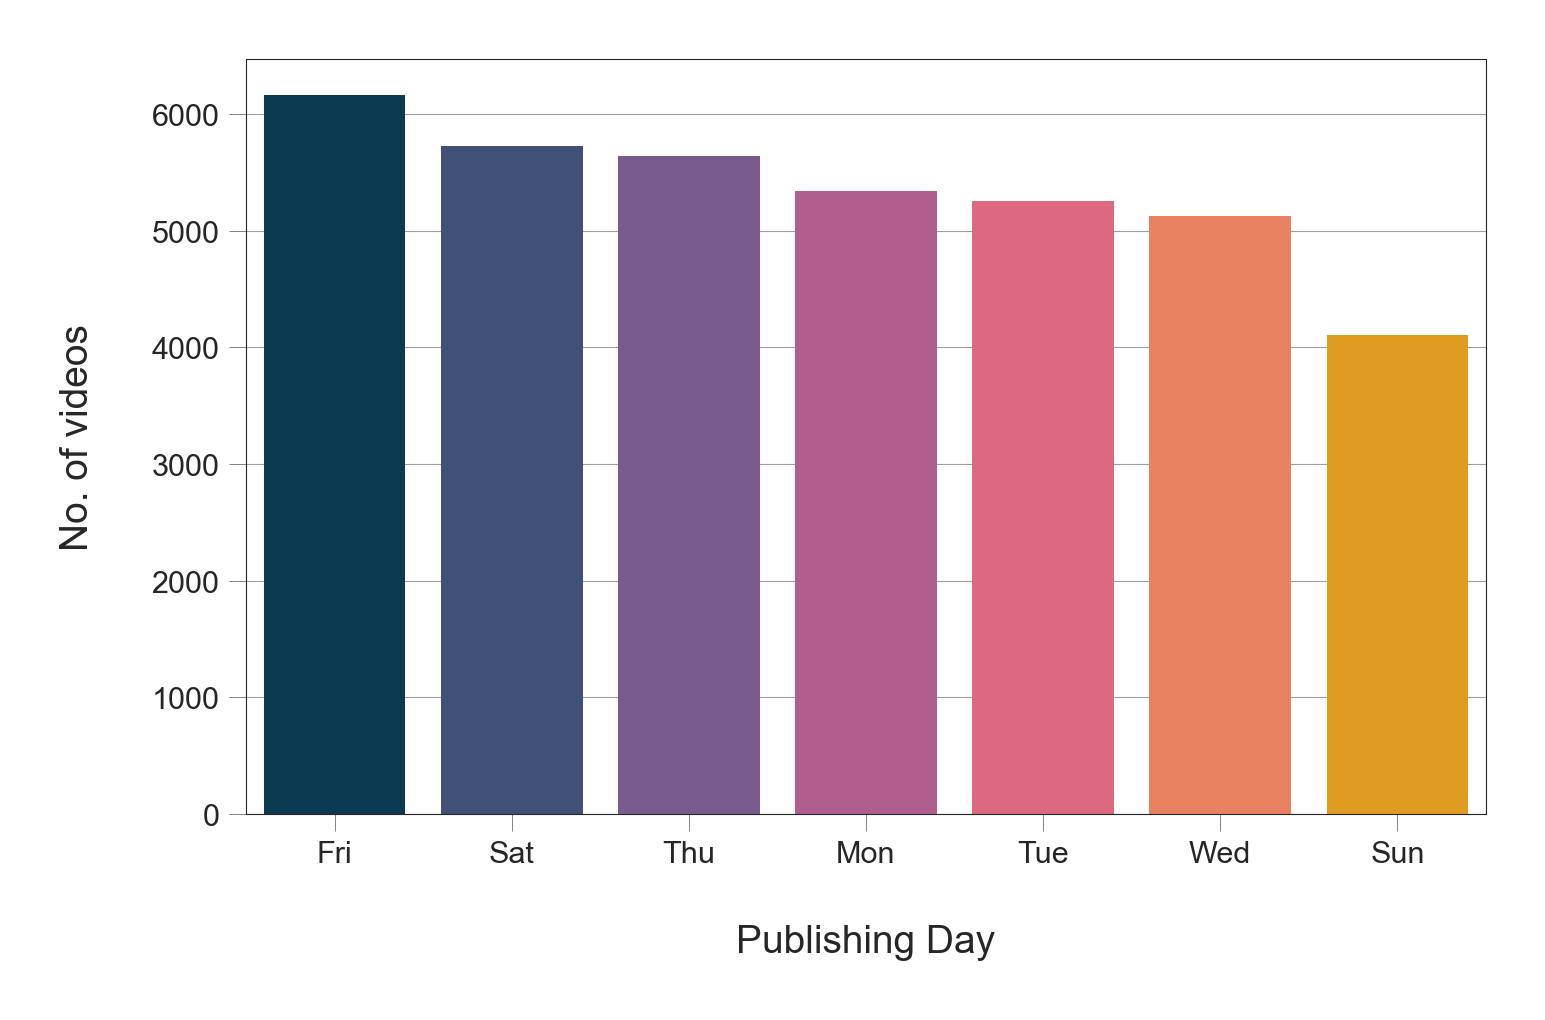

In [192]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sundayis noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos.

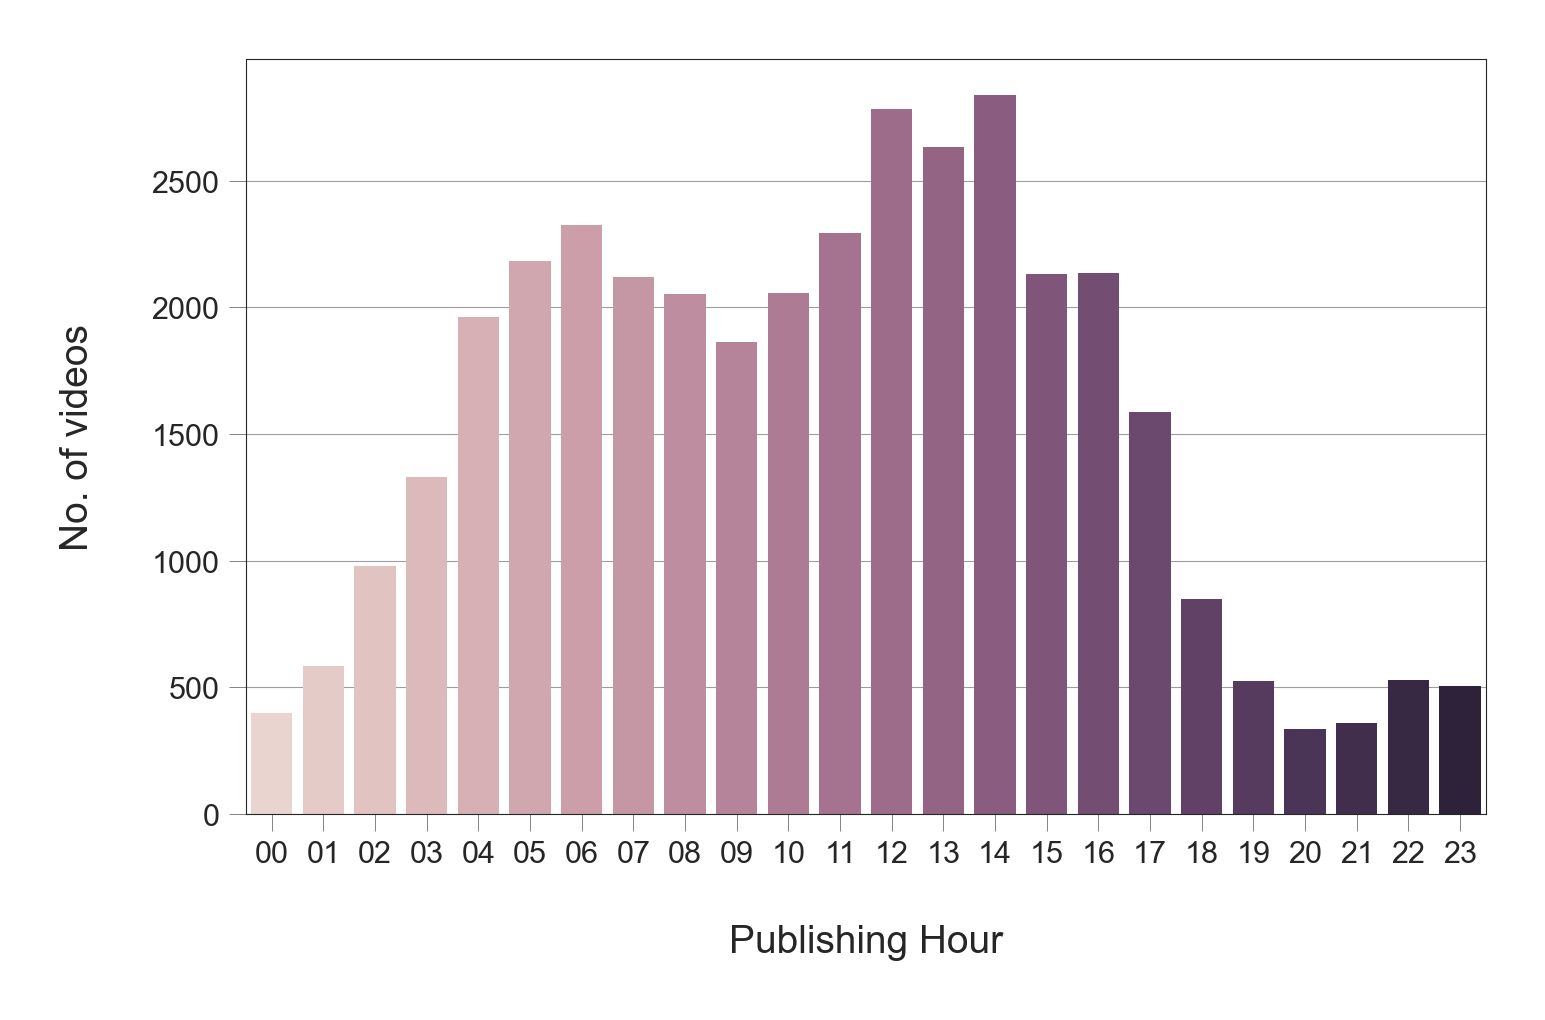

In [193]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 11AM(4.30 PM in India) and 4PM(9.30 PM in India), peaking between 12PM(5.30 PM in India) and 2PM(7.30 PM in India), had the largest number of trending videos. We notice also that the period between 8PM(1.30 AM in India) and 9PM(2.30 AM in India) has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 11AM(4.30 PM in India) and 4PM(9.30 PM in India)? Is it because how YouTube algorithm chooses trending videos?

# How many trending videos have an error?

To see how many trending videos got removed or had some error, we can use `video_error_or_removed` column in the dataset.

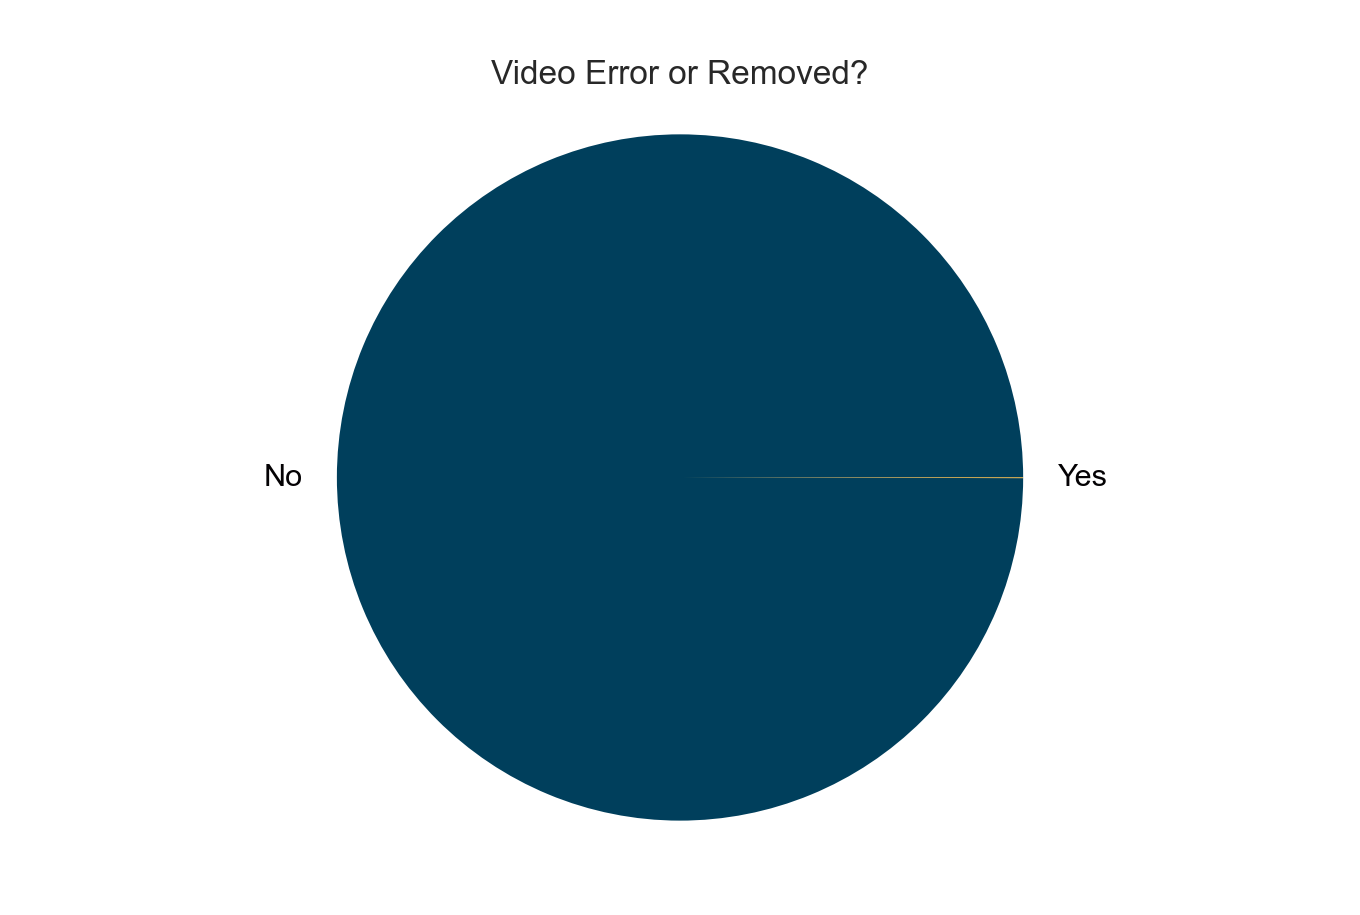

In [194]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

Well, the number of such videos looks very small. Let's see the exact number.

In [195]:
df["video_error_or_removed"].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

We can see that out of videos that appeared on trending list (`37352` videos), there is a tiny portion (`11` videos) with errors.

# How many trending videos have their comments disabled?

To know this, we can use `comments_disabled` column.

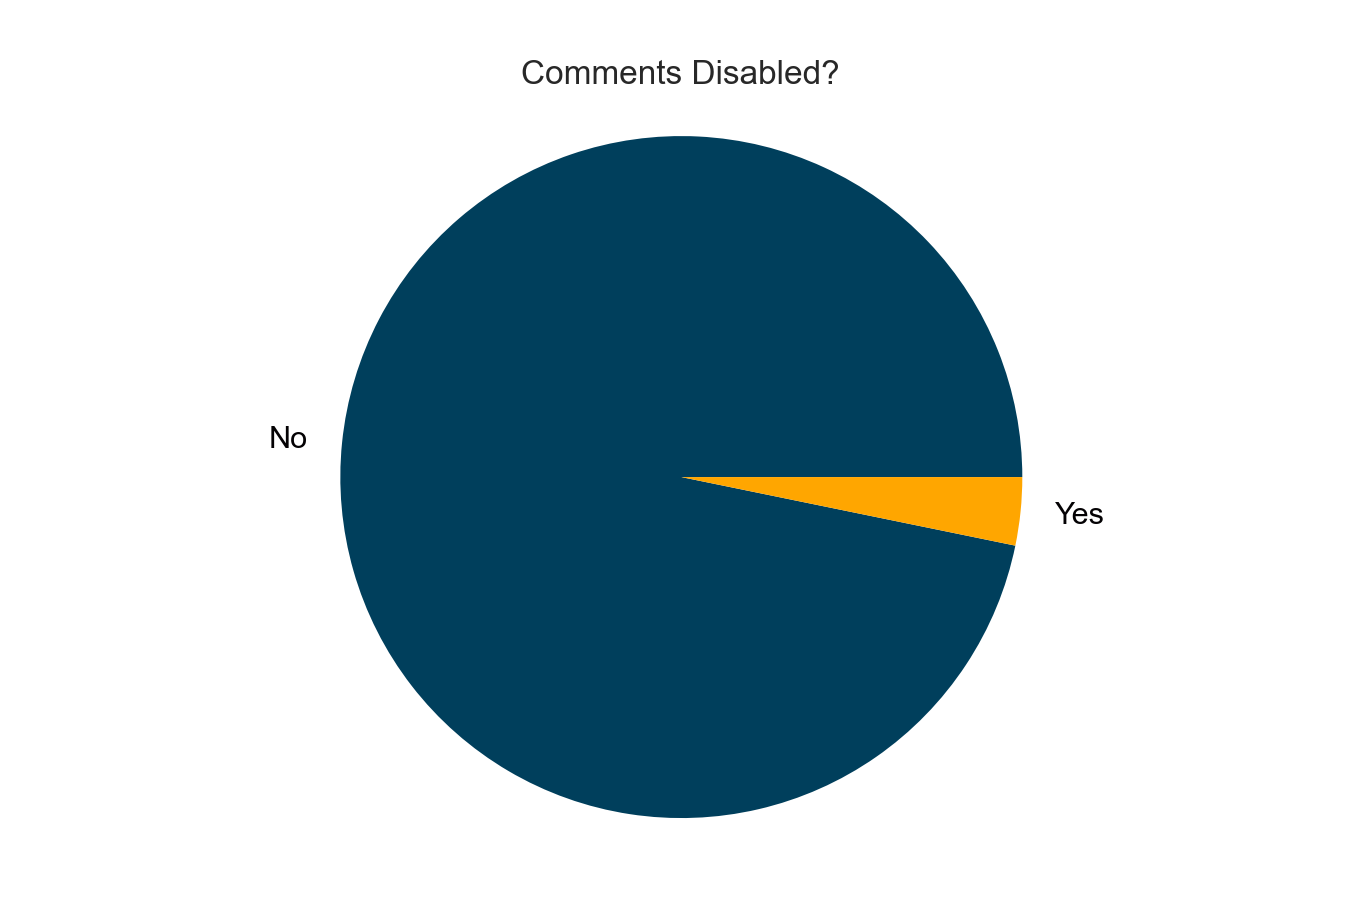

In [196]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [197]:
df["comments_disabled"].value_counts(normalize=True)

False   0.97
True    0.03
Name: comments_disabled, dtype: float64

We see that only `3%` of trending videos prevented users from commenting.

# How many trending videos have their ratings disabled?

To know this, we use `ratings_disabled` column.

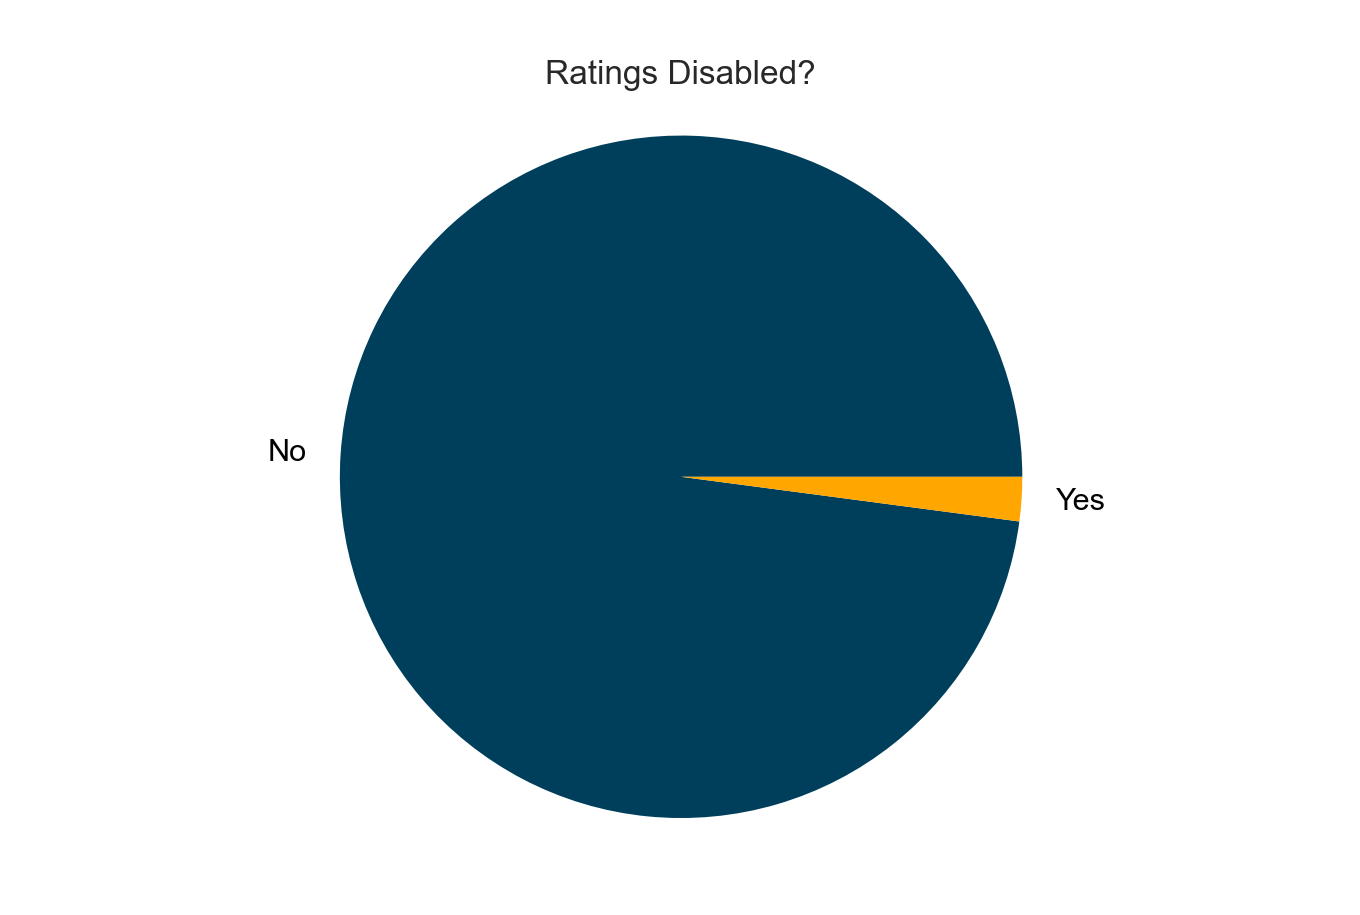

In [198]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [199]:
df["ratings_disabled"].value_counts()

False    36571
True       781
Name: ratings_disabled, dtype: int64

We see that only `781` trending videos out of `37352` have disabled ratings on their videos.

# How many videos have both comments and ratings disabled?

In [200]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

360

So there are just `360` trending videos that have both comments and ratings disabled.

# Conclusions

### Here are the some of the results we extracted from the analysis: 

* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018 and contains `37352` video entries.


* `86%` of trending videos have less than 1.5 million views, and `95%` have less than 5 million views.


* `87%` of trending videos have less than 40,000 likes, and `94%` have less than 100,000 likes.


* `88`% of trending videos have less than 3,500 comments, and `97`% have less than 25,000 comments.


* Some videos may appear on the trending videos list on more than one day. Our dataset contains `37352` entries but not for 37352 unique videos but for `16307 `unique videos.


* Trending videos that have `60,000,000` views and more have title length between `50` and `55` characters approximately.


* The delimiters `|` and `-` were common in trending video titles.


* The words `Official`, `Video`, `Trailer`, `Episode`, `Song` and `2018` were common also in trending video titles.


* There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.


* There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.


* The category that has the largest number of trending videos is 'Entertainment' with `16,712` videos, followed by 'News & Politics' category with `5241` videos, followed by 'Music' category with `3858` videos.


* On the opposite side, the category that has the smallest number of trending videos is 'Pets & Animals' with `3` videos, followed by 'Travel & Events' with `8` videos, followed by 'Movies' with `16` videos.

If you liked the analysis, please consider to **star** this [repository](https://github.com/ashutoshkrris/YouTube-Trending-Videos-Analysis.git).

Follow me on [LinkedIn](https://www.linkedin.com/in/ashutoshkrris), or visit my [website](http://ashutoshkrris.herokuapp.com).